<a href="https://colab.research.google.com/github/OmerRosen/Kaggle/blob/main/IMDB_2022_Hit_or_Flop_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [247]:
import requests
from IPython.core.display import HTML
import json
from time import sleep
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import traceback
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


<br><b>Observing The Data</b><br>
We will go over our different columns, make note of their scales and divide them into columns types for later preprocessing.

In [248]:
imdb_movie_dataset_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project/imdb_movie_dataset_raw.csv"
if os.path.exists(imdb_movie_dataset_path):
  imdb_movie_raw_dataset = pd.read_csv(imdb_movie_dataset_path, index_col=['movie_id'])
  imdb_movie_raw_list = imdb_movie_raw_dataset.T.to_dict()
  
else:
  imdb_movie_raw_list = {}
  imdb_movie_raw_dataset = pd.DataFrame(imdb_movie_raw_list)

print(f"imdb_movie_raw_list contains {len(imdb_movie_raw_list)} records")
imdb_movie_raw_dataset.head(3)

imdb_movie_raw_list contains 3900 records


_finshed_successfully   budget_usd  runtime_min  \
movie_id                                                      
tt1630029                    True  350000000.0        192.0   
tt6710474                    True   14300000.0        139.0   
tt10640346                   True   78000000.0        189.0   

                                   movie_name  title_length  \
movie_id                                                      
tt1630029            Avatar: The Way of Water             5   
tt6710474   Everything Everywhere All at Once             5   
tt10640346                            Babylon             1   

            movie_desc_length rating_catg  movie_year  release_year  \
movie_id                                                              
tt1630029                  40       PG-13        2022        2022.0   
tt6710474                  31           R        2022        2022.0   
tt10640346                 28           R        2022        2022.0   

           release_month  ... language_kazakh language_tamil  language_nepali  \
movie_id                  ...                                                   
tt1630029       December  ...           False          False            False   
tt6710474          April  ...           False          False            False   
tt10640346      December  ...           False          False            False   

            language_aboriginal  language_sinhala  language_ibo  \
movie_id                                                          
tt1630029                 False             False         False   
tt6710474                 False             False         False   
tt10640346                False             False         False   

            language_malayalam  language_telugu  language_aramaic  \
movie_id                                                            
tt1630029                False            False             False   
tt6710474                False            False             False   
tt10640346               False            False             False   

            language_pashtu  
movie_id                     
tt1630029             False  
tt6710474             False  
tt10640346            False  

[3 rows x 203 columns]

In [249]:
imdb_movie_raw_dataset.describe().T.astype(int)

count      mean        std   min  \
budget_usd                             1023  32126255   53128133     5   
runtime_min                            3892        97         16    31   
title_length                           3900         2          1     1   
movie_desc_length                      3900        28          8     3   
movie_year                             3900      2019          1  2018   
release_year                           3897      2020          1  2007   
cast_count_total                       3900       257        382     0   
cast_count_director                    3900         1          0     0   
cast_count_writer                      3900         2          2     0   
cast_count_cast                        3900        42         37     0   
cast_count_producer                    3900        11          9     0   
cast_count_composer                    3900         1          0     0   
cast_count_cinematographer             3900         1          0     0   
cast_count_editor                      3900         1          0     0   
cast_count_casting_director            3900         1          0     0   
cast_count_production_designer         3900         0          0     0   
cast_count_art_director                3900         1          1     0   
cast_count_set_decorator               3900         0          0     0   
cast_count_costume_designer            3900         0          0     0   
cast_count_make_up_department          3900         7         12     0   
cast_count_production_manager          3900         2          3     0   
cast_count_assistant_director          3900         4          5     0   
cast_count_art_department              3900        16         33     0   
cast_count_sound_department            3900        11         11     0   
cast_count_special_effects             3900         3          9     0   
cast_count_visual_effects              3900        42        159     0   
cast_count_stunts                      3900         9         25     0   
cast_count_camera_department           3900        21         31     0   
cast_count_animation_department        3900         4         21     0   
cast_count_casting_department          3900         2          3     0   
cast_count_costume_department          3900         6         12     0   
cast_count_editorial_department        3900         6          8     0   
cast_count_location_management         3900         3          8     0   
cast_count_music_department            3900         9         21     0   
cast_count_script_department           3900         1          1     0   
cast_count_transportation_department   3900         4          9     0   
cast_count_miscellaneous               3900        26         40     0   
cast_count_thanks                      3900         8         23     0   
genre__count                           3900         2          0     0   
language__count                        3900         1          0     1   
pred_metascore                         1823        55         15     7   
pred_user_review_count                 3887       231        623     1   
pred_critic_review_count               3718        61         92     1   
pred_total_vote_count                  3900     23169      73564   250   
pred_gross_worldwide                   1601  55524737  193478469    13   
pred_gross_us_canada                   1008  35180510   87967152   180   
pred_opening_weekend_us_canada          963  11478011   29311666    10   
main_crew_count                        3900         5          0     0   
crew_age_avg                           2633        47         13    13   
crew_age_missing                       3900         2          1     0   
crew_female_count                      3900         1          1     0   
crew_nonbinary_count                   3900         0          0     0   
crew_lgbt_count                        3900         0          0     0   
crew_prestige_wins                     390

## Categorize Column Types

<br>Upon looking at our data we can split it into the following types:<br>
1. Textual Columns - We will not be able to use them as they appear currently and they will be dropped for now.<br>
2. Numerical Columns - We will need to scale these later on.
3. Categorical Columns - We will need to convert these using One-Hot-Encoding.
4. Binary Columns
5. Result Column - This contain our Y values - Opening Week, Gross revenue and Metascore

In [250]:
# Predictor columns:
pred_metascore = ['pred_metascore']
pred_opening_weekend_us_canada = ['pred_opening_weekend_us_canada']
pred_gross_us_canada = ['pred_gross_us_canada']


columns_to_drop = ['movie_name','_finshed_successfully','artist','uri','movie_id','movie_year','pred_user_review_count','pred_critic_review_count','pred_total_vote_count','pred_gross_worldwide']
categorical_columns = []
binary_columns = []
numerical_columns = []
uncategorized_columns = []

binary_threshold = 20 # Below 10 positive values this column will be dropped
numerical_threshold = 30 # Below 10 total values this column will be dropped

dtype_dict = imdb_movie_raw_dataset.dtypes
for col, col_type in dtype_dict.items():
  if col not in columns_to_drop+pred_metascore+pred_opening_weekend_us_canada+pred_gross_us_canada:
    # handle binary columns:
    if col_type == bool:

      true_count = imdb_movie_raw_dataset[col].sum()
      
      if true_count<binary_threshold:
        print(f"dropping column {col} since it has only {true_count} actual records")
        columns_to_drop.append(col)
      else:
        binary_columns.append(col)
    
    # handle numerical columns:
    elif col_type in [float,int] :
      
      col_sum = imdb_movie_raw_dataset[col].sum()
      if col_sum<numerical_threshold:
        print(f"dropping column {col} since it has only {col_sum} sum values records")
        columns_to_drop.append(col)
      else:
        numerical_columns.append(col)

    elif col_type == object:
      #Try to convert to float:
      try:
        imdb_movie_raw_dataset[col] = imdb_movie_raw_dataset[col].astype(float)
        numerical_columns.append(col)
        print(f"col {col} was converted from type 'object' to type 'float'")
      # Check if categorical:
      except:
        if len(imdb_movie_raw_dataset[col].unique())<20:
          print(f"Col {col} is a categorical type column with {len(imdb_movie_raw_dataset[col].unique())} unique values:\n      {imdb_movie_raw_dataset[col].unique()}")
          categorical_columns.append(col)
        else:
          print(f"Unable to categorize column {col}")
          uncategorized_columns.append(col)
    else:
      print(col, col_type)
      uncategorized_columns.append(col)

predictor_columns = categorical_columns + binary_columns + numerical_columns
print(f"\nOur Dataset has: \n  {len(categorical_columns)} categorical_columns. \n  {len(binary_columns)} binary_columns. \n  {len(numerical_columns)} numerical_columns. \n   {len(uncategorized_columns)} uncategorized_columns. \n")

Col rating_catg is a categorical type column with 4 unique values:
      ['PG-13' 'R' 'Unrated' 'G']
Col release_month is a categorical type column with 13 unique values:
      ['December' 'April' 'November' 'August' 'May' 'January' 'March'
 'September' 'October' 'July' 'June' 'February' nan]
Unable to categorize column release_country
Col budget_currency is a categorical type column with 6 unique values:
      ['USD' nan 'EUR' 'CAD' 'RUB' 'GBP']
dropping column crew_nonbinary_count since it has only 8 sum values records
dropping column language_cantonese since it has only 14 actual records
dropping column language_hungarian since it has only 7 actual records
dropping column language_swedish since it has only 9 actual records
dropping column language_greek since it has only 14 actual records
dropping column language_tagalog since it has only 3 actual records
dropping column language_akan since it has only 3 actual records
dropping column language_xhosa since it has only 3 actual record

In [251]:
def get_log_of_amounts(amount_series):
  amount_series_log = []
  for val in amount_series:
    if val==None:
      amount_series_log.append(val)
    else:
      amount_series_log.append(np.log(val))
  return amount_series_log

In [252]:
data = imdb_movie_raw_dataset[predictor_columns+['movie_name']].copy()
y_metascore = imdb_movie_raw_dataset['pred_metascore']
y_opening_weekend_us_canada = imdb_movie_raw_dataset['pred_opening_weekend_us_canada']
y_opening_weekend_us_canada_log = get_log_of_amounts(y_opening_weekend_us_canada)

y_gross_us_canada = imdb_movie_raw_dataset['pred_gross_us_canada']
y_gross_us_canada_log  = get_log_of_amounts(y_gross_us_canada)


## Missing Data

In [253]:
nan_counts = data.isna().sum()
nan_counts_sorted = nan_counts.sort_values(ascending=False)


# print the results
print(nan_counts_sorted)


budget_usd             2877
crew_age_avg           1267
budget_currency         473
release_month            48
runtime_min               8
                       ... 
language_portuguese       0
genere_music              0
genere_biography          0
genere_sci-fi             0
movie_name                0
Length: 87, dtype: int64


In [254]:
data.tail(3)

rating_catg release_month budget_currency  genere_action  \
movie_id                                                             
tt3399888     Unrated           NaN             USD          False   
tt9741362     Unrated     September             USD          False   
tt7722156     Unrated           NaN             USD          False   

           genere_adventure  genere_fantasy  language_english  genere_comedy  \
movie_id                                                                       
tt3399888             False           False              True          False   
tt9741362             False           False              True          False   
tt7722156             False           False              True          False   

           language_mandarin  genere_drama  ...  main_crew_count  \
movie_id                                    ...                    
tt3399888              False          True  ...                5   
tt9741362              False          True  ...                5   
tt7722156              False         False  ...                5   

           crew_age_avg  crew_age_missing  crew_female_count  crew_lgbt_count  \
movie_id                                                                        
tt3399888          83.0                 4                  0                0   
tt9741362           NaN                 2                  1                0   
tt7722156           NaN                 5                  0                0   

           crew_prestige_wins  crew_prestige_nominations  crew_awards_wins  \
movie_id                                                                     
tt3399888                   0                          0                 5   
tt9741362                   0                          0                 3   
tt7722156                   0                          0                 6   

           crew_awards_nominations                   movie_name  
movie_id                                                         
tt3399888                        0                   Past Tense  
tt9741362                       20  A Stranger Among the Living  
tt7722156                        3                 Silent Panic  

[3 rows x 87 columns]

For any missing currency, assume USD is referred

### Fill missing data

If budget currency is missing, it is safe to assume the currency is USD

In [255]:

data['budget_currency'].fillna('USD', inplace=True)

If release_month is missin, we will fill it based on the Mode of release_month

In [256]:
mode_release_month = data['release_month'].mode()[0]

# Fill missing values in the 'release_month' column with the mode
data['release_month'].fillna(mode_release_month, inplace=True)

### Imputation

In [257]:
data[['budget_usd','crew_age_avg','crew_age_avg']].describe()

budget_usd  crew_age_avg  crew_age_avg
count  1.023000e+03   2633.000000   2633.000000
mean   3.212626e+07     47.802089     47.802089
std    5.312813e+07     13.300551     13.300551
min    5.000000e+00     13.000000     13.000000
25%    1.000000e+06     39.600000     39.600000
50%    1.000000e+07     46.750000     46.750000
75%    3.850000e+07     54.333333     54.333333
max    3.560000e+08    245.000000    245.000000

In [258]:
nan_mask = data['budget_usd'].isna()
nan_rows = data.loc[nan_mask]
nan_count = data['budget_usd'].isna().sum()
print(f"There are {nan_count} rows (out of {data.shape[0]}) with NaN values in the 'budget_usd' column.")

nan_rows[['budget_usd','movie_name']].head(10)

There are 2877 rows (out of 3900) with NaN values in the 'budget_usd' column.


budget_usd                        movie_name
movie_id                                                
tt11813216         NaN         The Banshees of Inisherin
tt19770238         NaN                          Aftersun
tt18925334         NaN                             Pearl
tt8110652          NaN              Bodies Bodies Bodies
tt12758486         NaN                         Chevalier
tt21440780         NaN         How to Blow Up a Pipeline
tt13669038         NaN                     Women Talking
tt14402146         NaN                   Empire of Light
tt3447590          NaN  Roald Dahl's Matilda the Musical
tt9288822          NaN                        The Wonder

Use IterativeImputer in order to fill in gaps regarding Budget.

In [259]:
# Save a backup copy
budget_usd_original = data['budget_usd'].copy()

In [260]:
scaler = StandardScaler()

data['budget_usd'] = scaler.fit_transform(data[['budget_usd']])

imputer_intger = KNNImputer(n_neighbors=10, weights='distance')
X_imputed = pd.DataFrame(imputer_intger.fit_transform(data[numerical_columns+binary_columns]), columns=numerical_columns+binary_columns, index=data.index)
X_imputed['budget_usd'] = scaler.inverse_transform(X_imputed[['budget_usd']]).astype(int)

for colm in categorical_columns:
  X_imputed[colm] = data[colm]



Add the fact budget was missing as a feature:

In [261]:
X_imputed["was_budget_missing"] = nan_mask
binary_columns.append("was_budget_missing")
X_imputed

budget_usd  runtime_min  title_length  movie_desc_length  \
movie_id                                                               
tt1630029    350000000        192.0           5.0               40.0   
tt6710474     14300000        139.0           5.0               31.0   
tt10640346    78000000        189.0           1.0               28.0   
tt9764362     35000000        107.0           2.0               26.0   
tt13833688    10000000        117.0           2.0               14.0   
...                ...          ...           ...                ...   
tt12280566     2293960         94.0           4.0               23.0   
tt7884922         7000        127.0           2.0               20.0   
tt3399888        35278         91.0           2.0               15.0   
tt9741362        20000         94.0           5.0               15.0   
tt7722156      2006077         96.0           2.0               22.0   

            release_year  cast_count_total  cast_count_director  \
movie_id                                                          
tt1630029         2022.0            2201.0                  1.0   
tt6710474         2022.0             564.0                  2.0   
tt10640346        2022.0            1067.0                  1.0   
tt9764362         2022.0             410.0                  1.0   
tt13833688        2022.0             274.0                  1.0   
...                  ...               ...                  ...   
tt12280566        2020.0              30.0                  1.0   
tt7884922         2022.0              42.0                  1.0   
tt3399888         2022.0               0.0                  0.0   
tt9741362         2020.0              38.0                  1.0   
tt7722156         2022.0               0.0                  0.0   

            cast_count_writer  cast_count_cast  cast_count_producer  ...  \
movie_id                                                             ...   
tt1630029                 9.0             68.0                  6.0  ...   
tt6710474                 2.0             44.0                 15.0  ...   
tt10640346                1.0            450.0                 14.0  ...   
tt9764362                 2.0             36.0                  8.0  ...   
tt13833688                3.0             10.0                  8.0  ...   
...                       ...              ...                  ...  ...   
tt12280566                3.0             11.0                  7.0  ...   
tt7884922                 1.0             31.0                  1.0  ...   
tt3399888                 0.0              0.0                  0.0  ...   
tt9741362                 1.0             24.0                  1.0  ...   
tt7722156                 0.0              0.0                  0.0  ...   

            language_american sign language  language_arabic  genere_western  \
movie_id                                                                       
tt1630029                               0.0              0.0             0.0   
tt6710474                               0.0              0.0             0.0   
tt10640346                              0.0              0.0             0.0   
tt9764362                               0.0              0.0             0.0   
tt13833688                              0.0              0.0             0.0   
...                                     ...              ...             ...   
tt12280566                              0.0              0.0             0.0   
tt7884922                               0.0              0.0             0.0   
tt3399888                               0.0              0.0             0.0   
tt9741362                               0.0              0.0             0.0   
tt7722156                               0.0              0.0             0.0   

            genere_musical  language_hindi  language_hebrew  rating_catg  \
movie_id                                                                   
tt1630029            

Check to see that original budget_usd values were not shifted or distorted

In [262]:
print(budget_usd_original[0:6])
print(X_imputed['budget_usd'].head(5))

movie_id
tt1630029     350000000.0
tt6710474      14300000.0
tt10640346     78000000.0
tt9764362      35000000.0
tt13833688     10000000.0
tt12593682     85900000.0
Name: budget_usd, dtype: float64
movie_id
tt1630029     350000000
tt6710474      14300000
tt10640346     78000000
tt9764362      35000000
tt13833688     10000000
Name: budget_usd, dtype: int64


Check to see that the imputed numbers make sense

In [263]:
print(budget_usd_original[-10:])
print(X_imputed['budget_usd'].tail(10))

movie_id
tt10009434        NaN
tt10264340    10000.0
tt9086718         NaN
tt10612148     3000.0
tt7246786       500.0
tt12280566        NaN
tt7884922      7000.0
tt3399888         NaN
tt9741362     20000.0
tt7722156         NaN
Name: budget_usd, dtype: float64
movie_id
tt10009434     198196
tt10264340      10000
tt9086718     1948312
tt10612148       3000
tt7246786         500
tt12280566    2293960
tt7884922        7000
tt3399888       35278
tt9741362       20000
tt7722156     2006077
Name: budget_usd, dtype: int64


## Data Balance

<br><b>Data Balance</b><br>
We will observe the ratio in our y values, in addition to our categorical and binary columns, and observe if there is an imbalance that requires intervention.



0 0 rating_catg None
1 1 release_month None
2 2 budget_currency None
genere action 730
genere adventure 446
genere fantasy 211
language english 3897
genere comedy 1125
language mandarin 49
genere drama 1800
genere history 72
language spanish 249
language italian 57
language french 171
genere horror 972
genere thriller 1017
language japanese 45
language russian 80
genere animation 166
genere mystery 419
language german 91
genere romance 415
genere crime 478
language latin 47
genere sci-fi 284
genere biography 172
genere music 82
language portuguese 20
genere family 180
language chinese 24
genere war 32
genere sport 57
language american sign language 21
language arabic 40
genere western 51
genere musical 35
language hindi 24
language hebrew 21
38 3 was_budget_missing 2


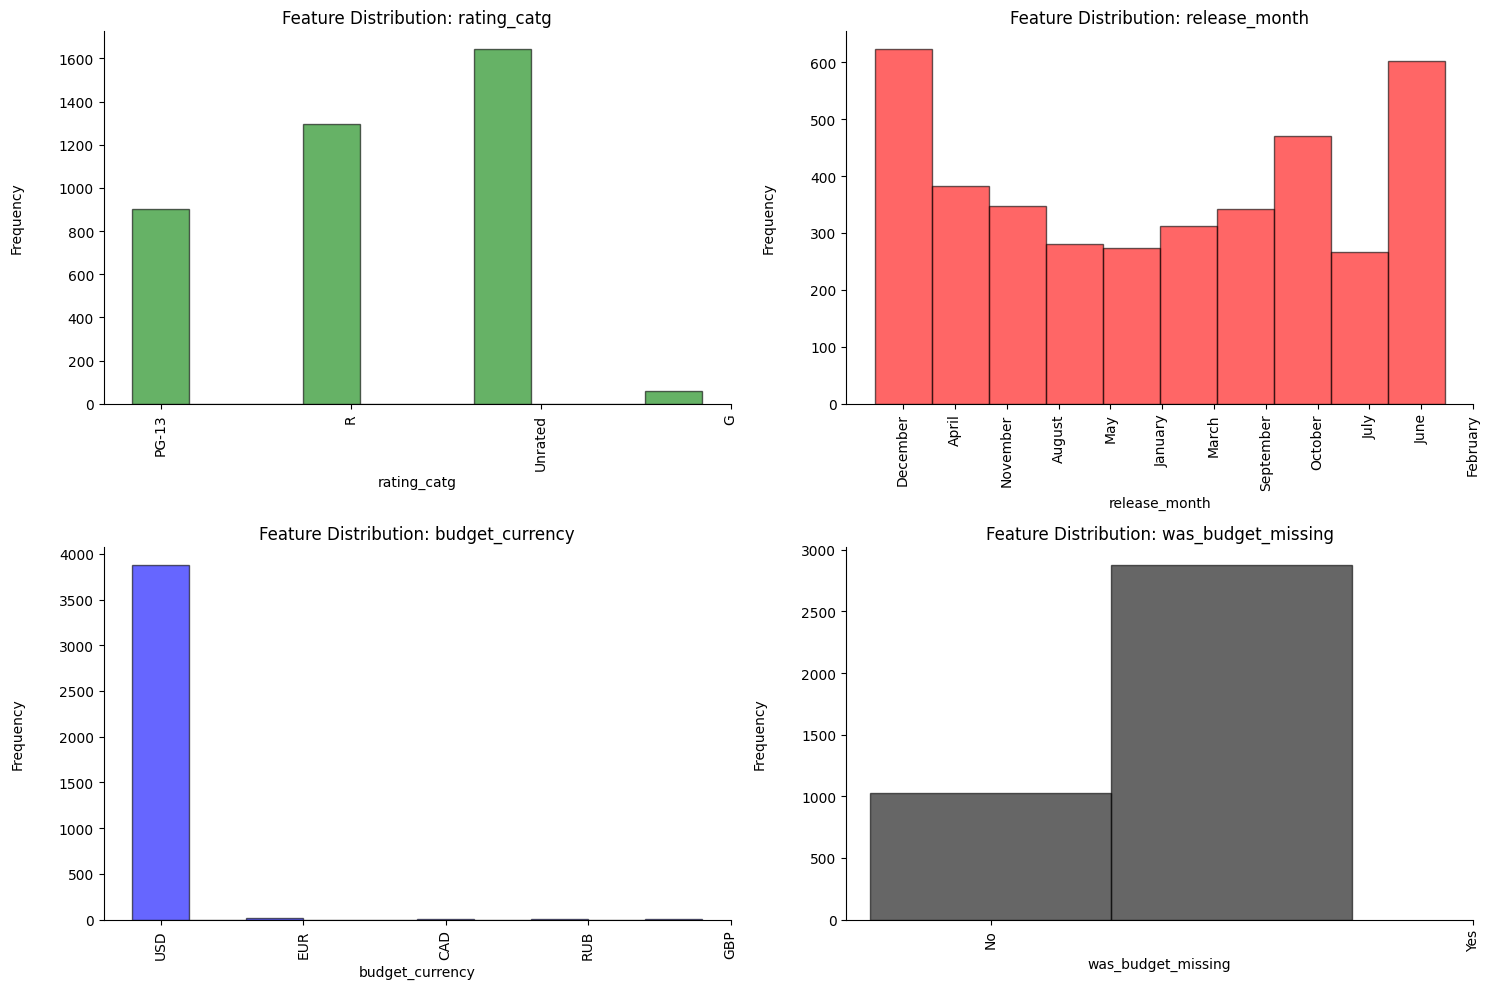

In [264]:
import math

cols_for_histogram = [col for col in categorical_columns +binary_columns if "genere_" not in col and "language_" not in col]
feature_num = len(cols_for_histogram)

binary_catg_dict = {"genere":{},"language":{}}

plot_per_row = 2
row_num = math.ceil(feature_num/plot_per_row)

fig = plt.gcf()
fig.set_size_inches(15,10)

c_list = ['g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink']

j = 0
for i,col in enumerate(categorical_columns +binary_columns):
  col_vals = X_imputed[[col]]
  col_vals_series = X_imputed[col]
  unique_vals = len(col_vals_series.unique())
  
  if col in binary_columns:
    col_vals_series = X_imputed[col].astype(int)
    bin_count = unique_vals
  else:
    bin_count = None
    
  if col in cols_for_histogram:

    print(i,j,col,bin_count)
    ax = fig.add_subplot(row_num,plot_per_row,j+1)
    j += 1
    height, bins, patches = ax.hist(x=col_vals_series, bins=bin_count, alpha=0.6, label=f"Feature {col}",density=False,edgecolor='k', color=c_list[i], align='left')
    
    if col in binary_columns:
      ax.set_xticks((0,1), labels=('No', 'Yes'))
    
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency',rotation=90,labelpad=25)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f'Feature Distribution: {col}')
    plt.xticks(rotation=90)

  else:
    categ = col.split('_')[0]
    categ_prop = col.split('_')[1]
    true_prop_count = col_vals_series.sum()
    print(categ,categ_prop,true_prop_count)
    binary_catg_dict[categ][categ_prop] = true_prop_count
    

plt.tight_layout()
plt.plot;

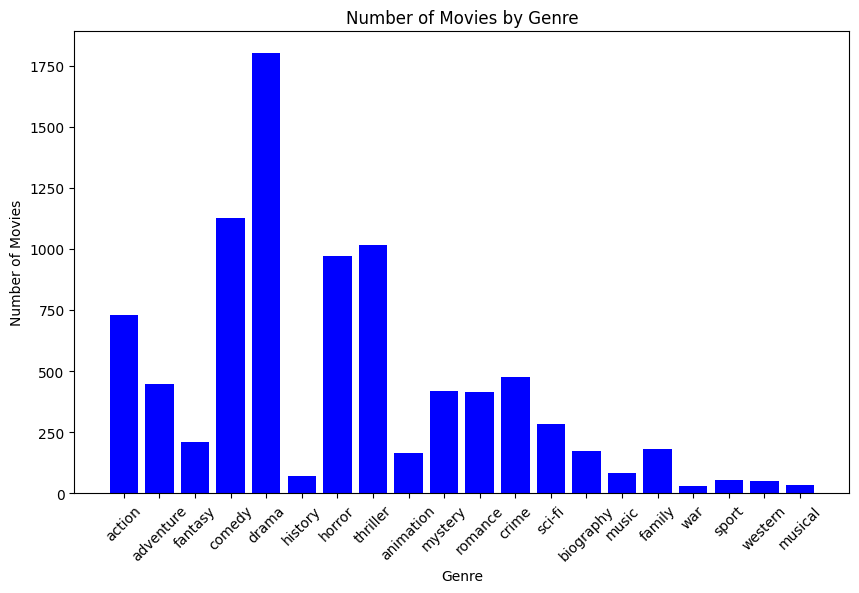

In [265]:
# Plot 'genere' bar plot
plt.figure(figsize=(10, 6))
plt.bar(binary_catg_dict['genere'].keys(), binary_catg_dict['genere'].values(), color='blue')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

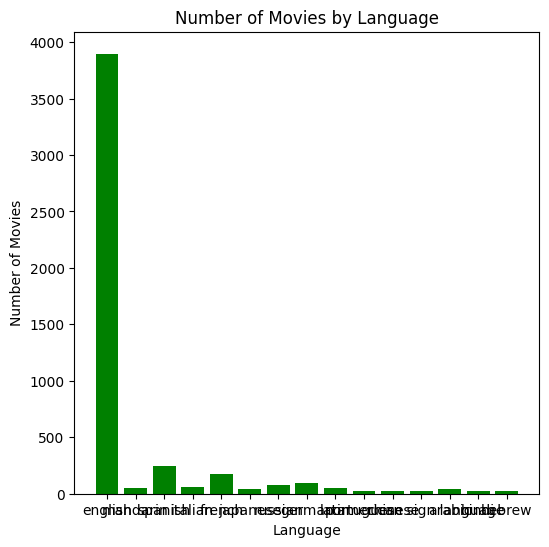

In [266]:
plt.figure(figsize=(6, 6))
plt.bar(binary_catg_dict['language'].keys(), binary_catg_dict['language'].values(), color='green')
plt.title('Number of Movies by Language')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.show()

<br><b>Predictor Corralation</b><br>
We will observe the relationship between each predictor individually and attempt to see if any noteable correlation are spotted between the feature and whether or not the song is a hit.<br><br>

In the plot below, we can notice some interesting relationships:<br>
1. Dancability - If your song has less than ~0.2 dancability rate you will not become a hit.
2. Loudness - There is a correlation between loudness and success
3. Speechness - If your speech-to-music ration is higher than 0.45 it decreases your odds significantly at having a hit.
4. Duration - The longer your song lasts the fewer people will listen to it again.
5. Sections - The number of sections the particular track has appear to have an effect on its success rate.

In [267]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [268]:
X_imputed

budget_usd  runtime_min  title_length  movie_desc_length  \
movie_id                                                               
tt1630029    350000000        192.0           5.0               40.0   
tt6710474     14300000        139.0           5.0               31.0   
tt10640346    78000000        189.0           1.0               28.0   
tt9764362     35000000        107.0           2.0               26.0   
tt13833688    10000000        117.0           2.0               14.0   
...                ...          ...           ...                ...   
tt12280566     2293960         94.0           4.0               23.0   
tt7884922         7000        127.0           2.0               20.0   
tt3399888        35278         91.0           2.0               15.0   
tt9741362        20000         94.0           5.0               15.0   
tt7722156      2006077         96.0           2.0               22.0   

            release_year  cast_count_total  cast_count_director  \
movie_id                                                          
tt1630029         2022.0            2201.0                  1.0   
tt6710474         2022.0             564.0                  2.0   
tt10640346        2022.0            1067.0                  1.0   
tt9764362         2022.0             410.0                  1.0   
tt13833688        2022.0             274.0                  1.0   
...                  ...               ...                  ...   
tt12280566        2020.0              30.0                  1.0   
tt7884922         2022.0              42.0                  1.0   
tt3399888         2022.0               0.0                  0.0   
tt9741362         2020.0              38.0                  1.0   
tt7722156         2022.0               0.0                  0.0   

            cast_count_writer  cast_count_cast  cast_count_producer  ...  \
movie_id                                                             ...   
tt1630029                 9.0             68.0                  6.0  ...   
tt6710474                 2.0             44.0                 15.0  ...   
tt10640346                1.0            450.0                 14.0  ...   
tt9764362                 2.0             36.0                  8.0  ...   
tt13833688                3.0             10.0                  8.0  ...   
...                       ...              ...                  ...  ...   
tt12280566                3.0             11.0                  7.0  ...   
tt7884922                 1.0             31.0                  1.0  ...   
tt3399888                 0.0              0.0                  0.0  ...   
tt9741362                 1.0             24.0                  1.0  ...   
tt7722156                 0.0              0.0                  0.0  ...   

            language_american sign language  language_arabic  genere_western  \
movie_id                                                                       
tt1630029                               0.0              0.0             0.0   
tt6710474                               0.0              0.0             0.0   
tt10640346                              0.0              0.0             0.0   
tt9764362                               0.0              0.0             0.0   
tt13833688                              0.0              0.0             0.0   
...                                     ...              ...             ...   
tt12280566                              0.0              0.0             0.0   
tt7884922                               0.0              0.0             0.0   
tt3399888                               0.0              0.0             0.0   
tt9741362                               0.0              0.0             0.0   
tt7722156                               0.0              0.0             0.0   

            genere_musical  language_hindi  language_hebrew  rating_catg  \
movie_id                                                                   
tt1630029            

## Features Correlation with Y

In [269]:
print_observations = False

In [270]:
X = X_imputed[categorical_columns +binary_columns + numerical_columns].copy()

In [271]:
if print_observations:
  color_map = []

  y_pred = y_metascore

  for val in y_pred:
      if val==1:
          color_map.append('g')
      else:
          color_map.append('r')
          
  coeff_num = len(predictor_columns)
  plot_col_num = 3
  row_num = math.ceil(coeff_num/plot_col_num)

  fig = plt.gcf()
  fig.set_size_inches(20,100)

  for i,pred_col in enumerate(predictor_columns):
      
      sigma = 0.1
      
      mu =0.001
      
      # generate normally distributed samples
      y_noise = sigma * np.random.randn(X.shape[0]) + mu
      x_noise = sigma * np.random.randn(X.shape[0]) + mu
      
      ax = fig.add_subplot(row_num,plot_col_num,i+1)
      x_val = X[pred_col]
      if pred_col in binary_columns:
          x_val = X[pred_col]+x_noise
          ax.set_xticks((0,1), labels=('No', 'Yes'))
          
      if pred_col in categorical_columns:
          x_val = X[pred_col]

      if pred_col in numerical_columns:
          x_val = X[pred_col]+x_noise
      
      cmap = cm.get_cmap('RdYlGn')

      ax.scatter(x_val,y_pred, cmap=cmap, c=y_pred)
      ax.set_xlabel(f'{pred_col}', fontsize=8)
      ax.set_ylabel(f'Metascore', fontsize=8)
      #ax.set_xlabel('Hit', fontsize=8)
      #ax.set_xticks((0,1), labels=('No', 'Yes'), fontsize=14)
      ax = plt.gca()
      ax.set_title(f'{pred_col} vs. Metascore').set_size(16)

      
  plt.tight_layout()
  plt.plot;

In [272]:
if print_observations:
  color_map = []

  y_pred = y_gross_us_canada_log

  for val in y_pred:
      if val==1:
          color_map.append('g')
      else:
          color_map.append('r')
          
  coeff_num = len(predictor_columns)
  plot_col_num = 3
  row_num = math.ceil(coeff_num/plot_col_num)

  fig = plt.gcf()
  fig.set_size_inches(20,100)

  for i,pred_col in enumerate(predictor_columns):
      
      sigma = 0.1
      
      mu =0.001
      
      # generate normally distributed samples
      y_noise = sigma * np.random.randn(X.shape[0]) + mu
      x_noise = sigma * np.random.randn(X.shape[0]) + mu
      
      ax = fig.add_subplot(row_num,plot_col_num,i+1)
      x_val = X[pred_col]
      if pred_col in binary_columns:
          x_val = X[pred_col]+x_noise
          ax.set_xticks((0,1), labels=('No', 'Yes'))
          
      if pred_col in categorical_columns:
          x_val = X[pred_col]

      if pred_col in numerical_columns:
          x_val = X[pred_col]+x_noise
      
      cmap = cm.get_cmap('RdYlGn')

      ax.scatter(x_val,y_pred, cmap=cmap, c=y_pred)
      ax.set_xlabel(f'{pred_col}', fontsize=8)
      ax.set_ylabel(f'Gross USD (log)', fontsize=8)
      #ax.set_xlabel('Hit', fontsize=8)
      #ax.set_xticks((0,1), labels=('No', 'Yes'), fontsize=14)
      ax = plt.gca()
      ax.set_title(f'{pred_col} vs. Gross USD (log)').set_size(16)

      
  plt.tight_layout()
  plt.plot;

In [273]:
if print_observations:
  color_map = []

  y_pred = y_opening_weekend_us_canada_log

  for val in y_pred:
      if val==1:
          color_map.append('g')
      else:
          color_map.append('r')
          
  coeff_num = len(predictor_columns)
  plot_col_num = 3
  row_num = math.ceil(coeff_num/plot_col_num)

  fig = plt.gcf()
  fig.set_size_inches(20,100)

  for i,pred_col in enumerate(predictor_columns):
      
      sigma = 0.1
      
      mu =0.001
      
      # generate normally distributed samples
      y_noise = sigma * np.random.randn(X.shape[0]) + mu
      x_noise = sigma * np.random.randn(X.shape[0]) + mu
      
      ax = fig.add_subplot(row_num,plot_col_num,i+1)
      x_val = X[pred_col]
      if pred_col in binary_columns:
          x_val = X[pred_col]+x_noise
          ax.set_xticks((0,1), labels=('No', 'Yes'))
          
      if pred_col in categorical_columns:
          x_val = X[pred_col]

      if pred_col in numerical_columns:
          x_val = X[pred_col]+x_noise
      
      cmap = cm.get_cmap('RdYlGn')

      ax.scatter(x_val,y_pred, cmap=cmap, c=y_pred)
      ax.set_xlabel(f'{pred_col}', fontsize=8)
      ax.set_ylabel(f'Opening Weekend USD (log)', fontsize=8)
      #ax.set_xlabel('Hit', fontsize=8)
      #ax.set_xticks((0,1), labels=('No', 'Yes'), fontsize=14)
      ax = plt.gca()
      ax.set_title(f'{pred_col} vs. Open Wknd (log)').set_size(13)

      
  plt.tight_layout()
  plt.plot;

## One Hot Encoding

<br><b>One Hot Encoding</b><br>
We will convert all of our categorical columns into binary columns.

In [274]:
print(f"Binary Columns before OHE: {len(binary_columns)}")
for i,col in enumerate(categorical_columns):
    onehot = pd.get_dummies(X[col], prefix=col)
    if i==0:
        X_ohe = X.join(onehot)
    else:
        X_ohe = X_ohe.join(onehot)
    X_ohe = X_ohe.drop([col], axis=1)
    print(f"Col {col} - Converted into {onehot.shape[1]} hot-encoded columns")

rating_cols = []
for col in X_ohe.columns:
  if "rating_catg" in col or "release_month" in col or "budget_currency" in col:
    rating_cols.append(col)
    binary_columns.append(col)

print(f"Binary Columns after OHE: {len(binary_columns)}")
X_ohe[rating_cols]

Binary Columns before OHE: 36
Col rating_catg - Converted into 4 hot-encoded columns
Col release_month - Converted into 12 hot-encoded columns
Col budget_currency - Converted into 5 hot-encoded columns
Binary Columns after OHE: 57


rating_catg_G  rating_catg_PG-13  rating_catg_R  \
movie_id                                                      
tt1630029               0                  1              0   
tt6710474               0                  0              1   
tt10640346              0                  0              1   
tt9764362               0                  0              1   
tt13833688              0                  0              1   
...                   ...                ...            ...   
tt12280566              0                  0              0   
tt7884922               0                  0              0   
tt3399888               0                  0              0   
tt9741362               0                  0              0   
tt7722156               0                  0              0   

            rating_catg_Unrated  release_month_April  release_month_August  \
movie_id                                                                     
tt1630029                     0                    0                     0   
tt6710474                     0                    1                     0   
tt10640346                    0                    0                     0   
tt9764362                     0                    0                     0   
tt13833688                    0                    0                     0   
...                         ...                  ...                   ...   
tt12280566                    1                    0                     0   
tt7884922                     1                    0                     0   
tt3399888                     1                    0                     0   
tt9741362                     1                    0                     0   
tt7722156                     1                    0                     0   

            release_month_December  release_month_February  \
movie_id                                                     
tt1630029                        1                       0   
tt6710474                        0                       0   
tt10640346                       1                       0   
tt9764362                        0                       0   
tt13833688                       1                       0   
...                            ...                     ...   
tt12280566                       0                       0   
tt7884922                        0                       1   
tt3399888                        0                       0   
tt9741362                        0                       0   
tt7722156                        0                       0   

            release_month_January  release_month_July  ...  \
movie_id                                               ...   
tt1630029                       0                   0  ...   
tt6710474                       0                   0  ...   
tt10640346                      0                   0  ...   
tt9764362                       0                   0  ...   
tt13833688                      0                   0  ...   
...                           ...                 ...  ...   
tt12280566                      0                   0  ...   
tt7884922                       0                   0  ...   
tt3399888                       0                   0  ...   
tt9741362                       0                   0  ...   
tt7722156                       0                   0  ...   

            release_month_March  release_month_May  release_month_November  \
movie_id                                                                     
tt1630029                     0                  0                       0   
tt6710474                     0                  0                       0   
tt10640346                    0                  0                       0   
tt9764362                     0                  0                       1   
tt13833688                    0                  0                       0   
...              

## Feature Correlation

<br><b>Feature Correlation</b><br>
We will check to see if there is any high correlation within our features.<br>
If the correlation is too high, we will drop one of the features.

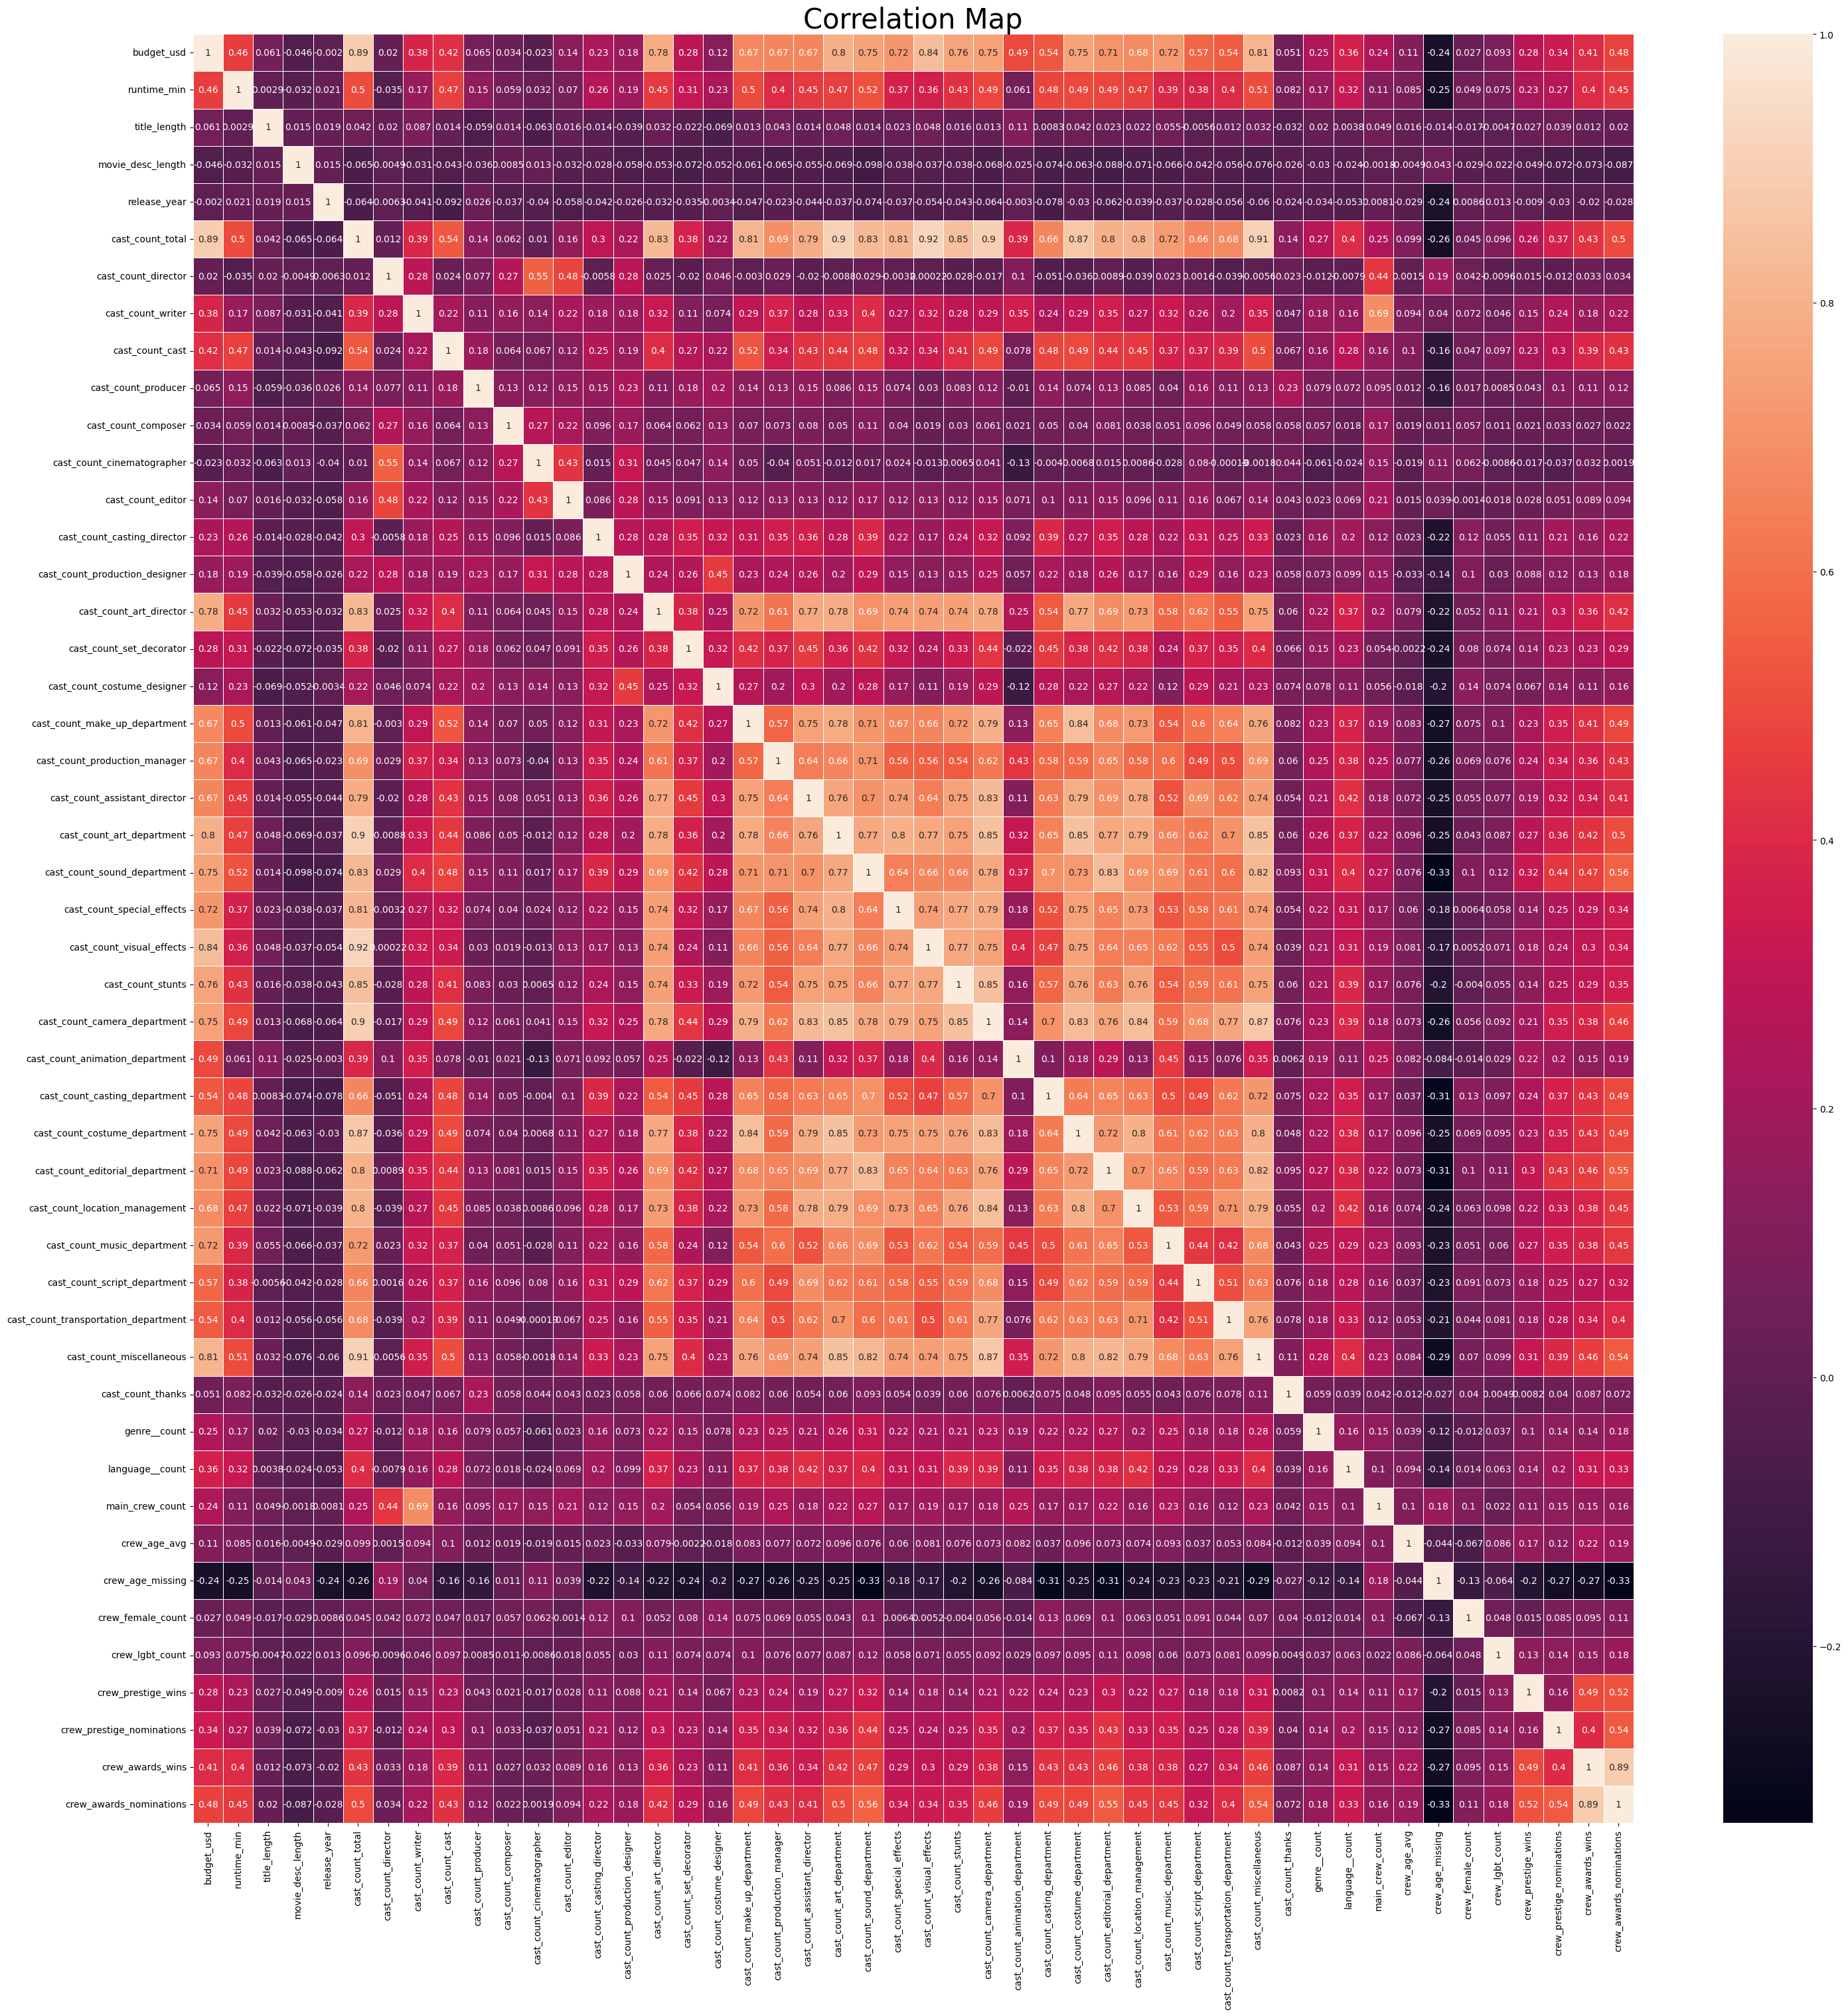

In [275]:
fig, ax = plt.subplots(figsize=(35,35))
ax.set_title("Correlation Map", fontdict={'fontsize': 30})
dataplot = sns.heatmap(X_ohe[numerical_columns].corr(), annot=True, linewidths=0.5, ax=ax)

In [276]:
print(f"Total Columns: {len(X_ohe.columns)}")
print(f"Integer Columns: {len(numerical_columns)}")
print(f"Binary Columns: {len(binary_columns)}")

Total Columns: 105
Integer Columns: 48
Binary Columns: 57


In [277]:
corr_matrix = X_ohe.corr().abs()
cols_to_keep_regradless = ['budget_usd', 'cast_count_total']

# Create a boolean mask of highly correlated features
print(f"Number Of features before: {X_ohe.shape[1]}")
high_corr_features = np.full(corr_matrix.shape[0], False, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.8:
            if not high_corr_features[j]:
                high_corr_features[i] = True

# Select the columns to keep
columns_to_drop = [column for column in X_ohe.columns if high_corr_features[X_ohe.columns.get_loc(column)] and column not in cols_to_keep_regradless]
for column in X_ohe.columns:
  if high_corr_features[X_ohe.columns.get_loc(column)] and column not in cols_to_keep_regradless:
    columns_to_drop.append(column)
    numerical_columns.remove(column)


print(f"columns_to_drop: {columns_to_drop}")
columns_to_keep = [column for column in X_ohe.columns if column not in columns_to_drop]


# Create a new DataFrame with only the selected columns
X_ohe_reduced = X_ohe[columns_to_keep].copy()
print(f"Number Of features after: {len(X_ohe_reduced.columns)}")
print(f"Integer Columns: {len(numerical_columns)}")
print(f"Binary Columns: {len(binary_columns)}")
X_ohe_reduced.head(3)

Number Of features before: 105
columns_to_drop: ['cast_count_make_up_department', 'cast_count_assistant_director', 'cast_count_art_department', 'cast_count_sound_department', 'cast_count_stunts', 'cast_count_camera_department', 'cast_count_costume_department', 'cast_count_editorial_department', 'crew_awards_wins', 'cast_count_make_up_department', 'cast_count_assistant_director', 'cast_count_art_department', 'cast_count_sound_department', 'cast_count_stunts', 'cast_count_camera_department', 'cast_count_costume_department', 'cast_count_editorial_department', 'crew_awards_wins']
Number Of features after: 96
Integer Columns: 39
Binary Columns: 57


genere_action  genere_adventure  genere_fantasy  language_english  \
movie_id                                                                        
tt1630029             1.0               1.0             1.0               1.0   
tt6710474             1.0               1.0             0.0               1.0   
tt10640346            0.0               0.0             0.0               1.0   

            genere_comedy  language_mandarin  genere_drama  genere_history  \
movie_id                                                                     
tt1630029             0.0                0.0           0.0             0.0   
tt6710474             1.0                1.0           0.0             0.0   
tt10640346            1.0                0.0           1.0             1.0   

            language_spanish  language_italian  ...  release_month_March  \
movie_id                                        ...                        
tt1630029                0.0               0.0  ...                    0   
tt6710474                0.0               0.0  ...                    0   
tt10640346               1.0               1.0  ...                    0   

            release_month_May  release_month_November  release_month_October  \
movie_id                                                                       
tt1630029                   0                       0                      0   
tt6710474                   0                       0                      0   
tt10640346                  0                       0                      0   

            release_month_September  budget_currency_CAD  budget_currency_EUR  \
movie_id                                                                        
tt1630029                         0                    0                    0   
tt6710474                         0                    0                    0   
tt10640346                        0                    0                    0   

            budget_currency_GBP  budget_currency_RUB  budget_currency_USD  
movie_id                                                                   
tt1630029                     0                    0                    1  
tt6710474                     0                    0                    1  
tt10640346                    0                    0                    1  

[3 rows x 96 columns]

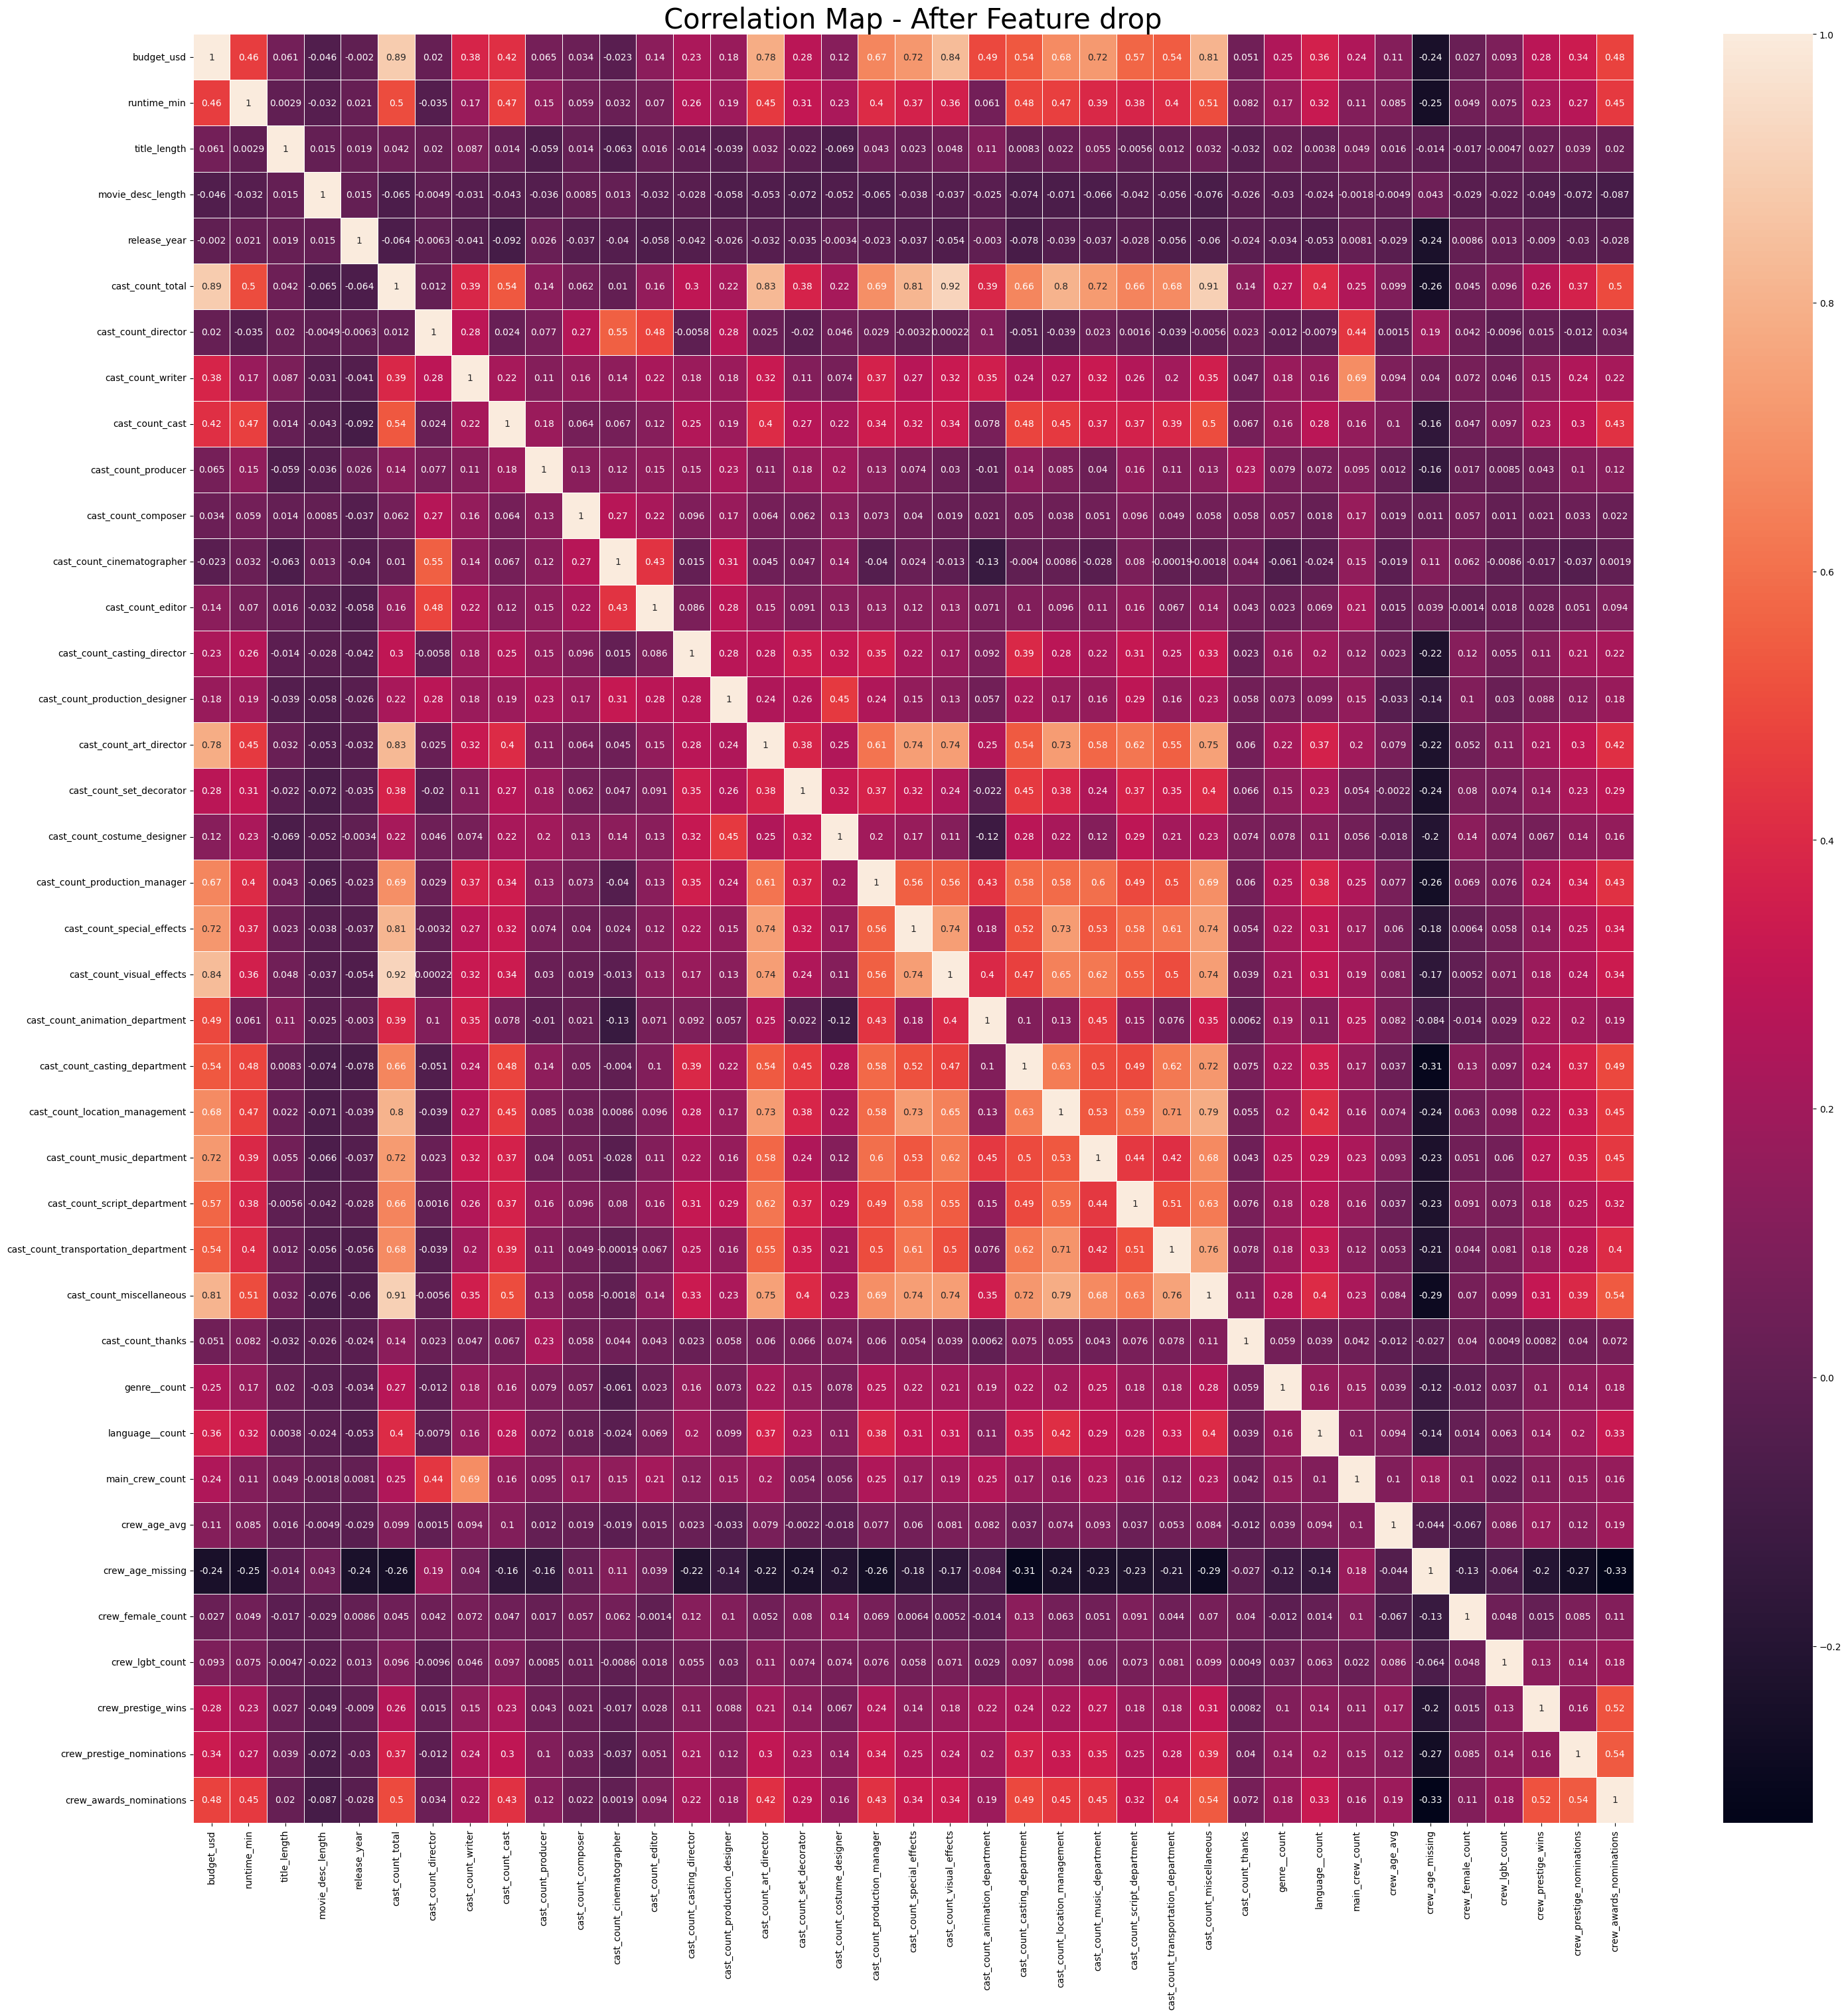

In [278]:
fig, ax = plt.subplots(figsize=(35,35))
ax.set_title("Correlation Map - After Feature drop", fontdict={'fontsize': 30})
dataplot = sns.heatmap(X_ohe_reduced[numerical_columns].corr(), annot=True, linewidths=0.5, ax=ax)

In [279]:
# Data Preperation - Opening Week

# Data Preperation

In [280]:
import os
import math
import warnings
import itertools
from timeit import default_timer as timer

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup 
import re
import time
import progressbar

from sklearn.model_selection import cross_val_score, train_test_split,cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import seaborn as sns

### Filter Missing Ys - Opening Week

In [281]:
opening_week_na_mask = y_opening_weekend_us_canada.isna()
y_opening_week = y_opening_weekend_us_canada[~opening_week_na_mask]
y_opening_week_log = np.log(y_opening_week)
X_opening_week = X_ohe_reduced[~opening_week_na_mask]
X_opening_week.shape,y_opening_week.shape
print(f"Only {len(y_opening_week)} out of {len(opening_week_na_mask)} records had Opening Week Revenue and will be kept")

Only 963 out of 3900 records had Opening Week Revenue and will be kept


### Scale Data - Opening Week

In [282]:
scalar_metascore = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_opening_week[numerical_columns])

X_opening_week_scaled = pd.DataFrame(scalar_metascore.transform(X_opening_week[numerical_columns]),columns=numerical_columns, index=X_opening_week.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_opening_week[binary_col]
  X_opening_week_scaled[binary_col] = bin_s

feature_names = X_opening_week_scaled.columns
X_opening_week_scaled

budget_usd  runtime_min  title_length  movie_desc_length  \
movie_id                                                               
tt1630029     6.360715     4.952369      1.554696           1.485048   
tt6710474    -0.354345     1.847275      1.554696           0.456527   
tt10640346    0.919856     4.776609     -1.058170           0.113687   
tt9764362     0.059721    -0.027499     -0.404954          -0.114873   
tt13833688   -0.440358     0.558368     -0.404954          -1.486234   
...                ...          ...           ...                ...   
tt4631048    -0.636389    -1.902272      0.901480           0.799367   
tt5980638    -0.638590    -0.671952     -0.404954          -1.714794   
tt6289224    -0.630989    -0.203259     -0.404954          -0.800554   
tt6887540    -0.604328     0.441195      1.554696           1.027927   
tt4887002    -0.581421    -0.437605      0.248263          -0.343434   

            release_year  cast_count_total  cast_count_director  \
movie_id                                                          
tt1630029       1.471483          2.698278            -0.257238   
tt6710474       1.471483          0.051395             2.350345   
tt10640346      1.471483          0.864701            -0.257238   
tt9764362       1.471483         -0.197609            -0.257238   
tt13833688      1.471483         -0.417509            -0.257238   
...                  ...               ...                  ...   
tt4631048      -0.588354         -0.792632            -0.257238   
tt5980638       0.098258         -0.711786            -0.257238   
tt6289224       0.784871         -0.747358            -0.257238   
tt6887540      -1.274967         -0.653578            -0.257238   
tt4887002       0.098258         -0.630941            -0.257238   

            cast_count_writer  cast_count_cast  cast_count_producer  ...  \
movie_id                                                             ...   
tt1630029            2.025612         0.130869            -0.853382  ...   
tt6710474           -0.474324        -0.357608             0.218540  ...   
tt10640346          -0.831458         7.905794             0.099438  ...   
tt9764362           -0.474324        -0.520433            -0.615177  ...   
tt13833688          -0.117190        -1.049617            -0.615177  ...   
...                       ...              ...                  ...  ...   
tt4631048           -0.831458        -1.090323            -1.091587  ...   
tt5980638           -0.831458        -0.540787            -0.138767  ...   
tt6289224           -0.117190        -0.377961            -0.138767  ...   
tt6887540           -0.831458         0.151222            -0.972484  ...   
tt4887002           -0.474324        -0.520433             0.218540  ...   

            release_month_March  release_month_May  release_month_November  \
movie_id                                                                     
tt1630029                     0                  0                       0   
tt6710474                     0                  0                       0   
tt10640346                    0                  0                       0   
tt9764362                     0                  0                       1   
tt13833688                    0                  0                       0   
...                         ...                ...                     ...   
tt4631048                     1                  0                       0   
tt5980638                     0                  0                       0   
tt6289224                     0                  0                       0   
tt6887540                     0                  0                       0   
tt4887002                     0                  0                       0   

            release_month_October  release_month_September  \
movie_id                                                     
tt1630029                       0                        0   
tt6710474    

### Split Train-Test - Opening Week

In [283]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_opening_week_scaled, y_opening_week_log, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

Train DataSet: 770 with 96 features
Test DataSet: 193 with 96 features


Mean Squared Error: 2.9585
R-squared: 0.7068


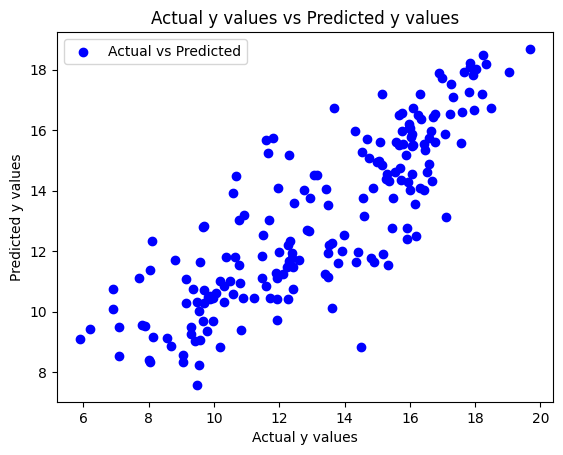

In [284]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model
rf_regressor.fit(x_train_scaled, y_train.ravel())

# Make predictions
y_pred = rf_regressor.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot actual y values against predicted y values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Actual y values vs Predicted y values')
plt.legend()
plt.show()

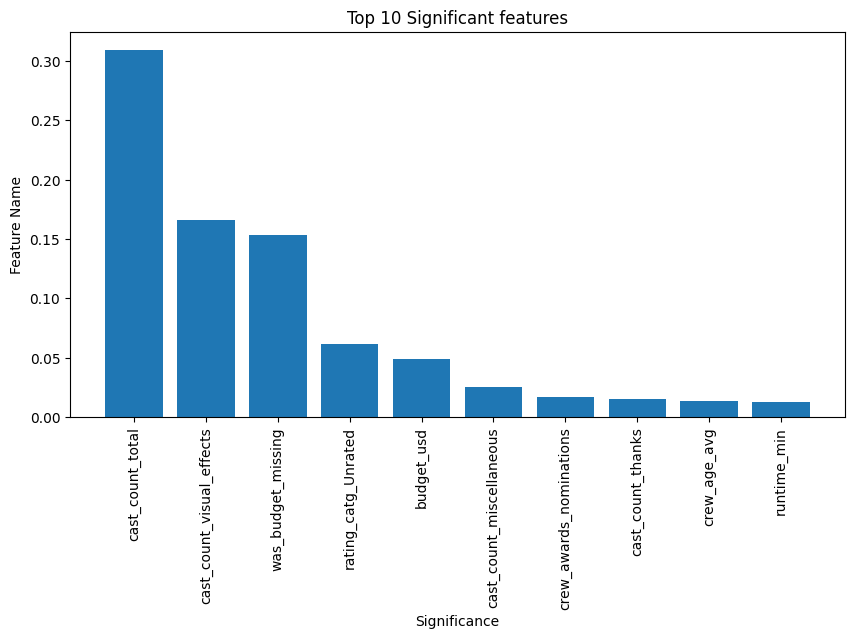

In [285]:
# Get feature importances
features_importances = {}
importances = rf_regressor.feature_importances_
for i,importance in enumerate(importances):
  feature_name = x_train_scaled.columns[i]
  features_importances[feature_name] = importance


# Sort the dictionary by descending values
sorted_data = dict(sorted(features_importances.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 items
top_10 = dict(list(sorted_data.items())[:10])

# Plot the top 10 items as a bar plot
plt.figure(figsize=(10, 5))
plt.title("Top 10 Significant features")
plt.bar(top_10.keys(), top_10.values())
plt.xlabel("Significance")
plt.ylabel("Feature Name")
plt.xticks(range(len(top_10)), top_10.keys(), rotation=90)
plt.show()


# Model Exploring

<br><br><br><b>Model Exploring</b><br>
In this section we will train and fine-turn various models to achieve the best prediction on our test dataset.

Please see a brief description of our work-plan:<br><br>
<b>Single Classifiers</b> - We will use a brute force method to train and fine tune 3 different Classifier types:
1. LogisticRegression
2. DecisionTreeClassifier
3. KNeighborsClassifier<br>

For each of these models, we wil try various hyper-parameter tunning and report the results.<br>

We will report the following:
* Trainning-Validation scores based on Cross-Validation
* Test scores based on test data prediction.
* AUC scores based on False-True/Negative-Positive ratios for each threshold and an ROC curve.<br>

We will then select our best performing model for feature importance, and attempt to improve its performence by removing features of low significance.

<b>Ensamle Models</b>:<br>
For this, we will split the training dataset into train80 and val.<br>
We will try and enhance the performence of a DecisionTreeClassifier model using the following bootstraping methods:<br>


<b>Boosting</b>
1. AdaBoostClassifier<br>

<b>Bagging:</b><br><br>
2. BaggingClassifier<br>
3. RandomForestClassifier<br>

We will report the following:
* Trainning scores based on train data pefromence.
* Validation scores based on validation dataset
* Test scores based on test data prediction.
* AUC scores based on False-True/Negative-Positive ration for each threshold and an ROC curve.<br>

We will then select our best performing method for feature importance, and attempt to improve its performence by removing features of low significance.

## Functions:

### Importing libraries

In [323]:
import inspect


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error

List of models and hyper-parameters that we would like to examine:

### Function: Construct Hyper Parameter table:

The function is meant to iterate over our list of models, match them with the hyper-parameters relevant to them and provide a row for each model-parameter-combination.:<br>

In [287]:
dict_of_models = {'LinearRegression':LinearRegression(),
                  'DecisionTreeRegressor':DecisionTreeRegressor()
                 }


Since different models have different hyper-parameters, we have composed a list of all parameters across our models and the values for each hyper parameter we would like to explore.

In [288]:
parametersOfValue = {
    'fit_intercept':[True,False],
    'n_neighbors':[2,4,8,15,50,80],
    'n_estimators':[50,100,500],
    'max_depth':[1,2,5,10,20,50],
    'learning_rate':[1,0.1,0.01,0.001,0.0001],
    'random_state':[1],
    'penalty':['l1','l2'],
    'solver':['saga'],
    'alpha':[1,0.1,0.01,0.001,0.0001],
    'C':[1,0.1,0.01,0.001,0.0001]
}

In [289]:
# get lists and output a dict of combinations:

def create_combination_dict(classifierName,parametersOfValue):
    prop_combinations = list(itertools.product(*(parametersOfValue[Name] for Name in parametersOfValue)))
    combinationsDict ={}
    for i,item in enumerate(prop_combinations):
        modelTempName = "%s_%s"%(classifierName,i)
        #print(modelTempName)
        combinationsDict[modelTempName]={'model_type':classifierName}
        for j,colName in enumerate(parametersOfValue.keys()):
            combinationsDict[modelTempName][colName]=item[j]
    
    
    return combinationsDict

<br>The get_hyperparameter_combinations_per_classifier function receives a classifier and creates n rows of hyper-parameter combinations (Based on parametersOfValue list)

In [290]:
def get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue):

    # Extract the hyper-parameters from our selected model:
    paramList = regression_model.get_params()

    classifierParametsOfValue = {}
    
    # Iterate over the parameters and match them to the parameter of value list:
    for param in paramList:
        if param in parametersOfValue.keys():
            classifierParametsOfValue[param]=parametersOfValue[param]

    # Convert list of hyper-parameters into a dictionary of parameter-combination
    combinationsDict_ForModel = create_combination_dict(classifierName,classifierParametsOfValue)

    relevantParametersForModel = combinationsDict_ForModel[list(combinationsDict_ForModel.keys())[0]].keys()
    print('Model Type: %s - %s hyper-parameter combinations'%(classifierName,len(combinationsDict_ForModel)))
    
    return combinationsDict_ForModel


### --------------------------------------------------------------------------------------------------------------------###
#Example run:


classifierName,regression_model = ('LinearRegression',LinearRegression())
combinationsDict_ForModel = get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue=parametersOfValue)
pd.DataFrame(combinationsDict_ForModel).T.head(10)

Model Type: LinearRegression - 2 hyper-parameter combinations


model_type fit_intercept
LinearRegression_0  LinearRegression          True
LinearRegression_1  LinearRegression         False

<br>We then over our list of model, and for each model retrieve a list of all available hyper-parameter combinations and append them to dictionary

In [291]:
def get_all_model_combinations(dict_of_models,parametersOfValue):
  all_model_combinations = {}

  for classifierName,regression_model in dict_of_models.items():
      #print(classifierName,regression_model)
      combinationsDict_ForModel = get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue=parametersOfValue)
      #print(combinationsDict_ForModel)
      all_model_combinations.update(combinationsDict_ForModel)

  all_model_combinations_df = pd.DataFrame(all_model_combinations).T
  return all_model_combinations_df

all_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
all_model_combinations_df

Model Type: LinearRegression - 2 hyper-parameter combinations
Model Type: DecisionTreeRegressor - 6 hyper-parameter combinations


model_type fit_intercept max_depth  \
LinearRegression_0            LinearRegression          True       NaN   
LinearRegression_1            LinearRegression         False       NaN   
DecisionTreeRegressor_0  DecisionTreeRegressor           NaN         1   
DecisionTreeRegressor_1  DecisionTreeRegressor           NaN         2   
DecisionTreeRegressor_2  DecisionTreeRegressor           NaN         5   
DecisionTreeRegressor_3  DecisionTreeRegressor           NaN        10   
DecisionTreeRegressor_4  DecisionTreeRegressor           NaN        20   
DecisionTreeRegressor_5  DecisionTreeRegressor           NaN        50   

                        random_state  
LinearRegression_0               NaN  
LinearRegression_1               NaN  
DecisionTreeRegressor_0            1  
DecisionTreeRegressor_1            1  
DecisionTreeRegressor_2            1  
DecisionTreeRegressor_3            1  
DecisionTreeRegressor_4            1  
DecisionTreeRegressor_5            1

<br>Our final result is a data frame containing all the model types and their hyper-parameters that we will use in our test.

In [292]:
print(f'There are {all_model_combinations_df.shape[0]} different model combinations for us to test')
all_model_combinations_df

There are 8 different model combinations for us to test


model_type fit_intercept max_depth  \
LinearRegression_0            LinearRegression          True       NaN   
LinearRegression_1            LinearRegression         False       NaN   
DecisionTreeRegressor_0  DecisionTreeRegressor           NaN         1   
DecisionTreeRegressor_1  DecisionTreeRegressor           NaN         2   
DecisionTreeRegressor_2  DecisionTreeRegressor           NaN         5   
DecisionTreeRegressor_3  DecisionTreeRegressor           NaN        10   
DecisionTreeRegressor_4  DecisionTreeRegressor           NaN        20   
DecisionTreeRegressor_5  DecisionTreeRegressor           NaN        50   

                        random_state  
LinearRegression_0               NaN  
LinearRegression_1               NaN  
DecisionTreeRegressor_0            1  
DecisionTreeRegressor_1            1  
DecisionTreeRegressor_2            1  
DecisionTreeRegressor_3            1  
DecisionTreeRegressor_4            1  
DecisionTreeRegressor_5            1

### Function: Build and fit model for each record

In [333]:
import inspect

def run_various_models_return_results(all_model_combinations_df, dict_of_models, use_cross_validate = True):
  dict_of_fitted_models = {}
  list_of_fitted_models = []

  for i,model_row in enumerate(all_model_combinations_df.T.items()):
      
      start = timer()
      
      # Take existing model and set it hyper parameters based on instructions:
      model_name = model_row[0]
      model_type = model_row[1][0]
      regression_model = clone(dict_of_models[model_type])
      model_props = regression_model.get_params()
      
      
      model_properties_instructions = model_row[1][1:]
      
      
      for prop_instruction in model_properties_instructions.index:
          if (prop_instruction in list(model_props.keys())):
              model_props[prop_instruction]=model_properties_instructions[prop_instruction]
              
      regression_model.set_params(**model_props)
      
      #print(f"Model Name: {model_name} - {regression_model}")
      if use_cross_validate == True:
        cross_val = cross_validate(regression_model, x_train_scaled, y_train, cv=3, scoring='r2', return_train_score=True)
      
        train_score = (np.mean(cross_val['train_score']))
        val_score = (np.mean(cross_val['test_score']))
      else:
        val_score = None
      
      # Fit on entire training data
      regression_model.fit(x_train_scaled, y_train)
      test_score = regression_model.score(x_test_scaled,y_test)
      train_score = regression_model.score(x_train_scaled,y_train)

      print(model_name,model_type,regression_model,train_score,test_score)
      
      all_model_combinations_df.at[model_name,'train_score']=train_score
      all_model_combinations_df.at[model_name,'val_score']=val_score
      all_model_combinations_df.at[model_name,'test_score_r2']=test_score
      
      yhat= regression_model.predict(x_test_scaled)
      mse = mean_squared_error(y_test, yhat)
      all_model_combinations_df.at[model_name,'test_score_mse']=mse
          
      
      all_model_combinations_df.at[model_name,'train_size']=x_train_scaled.shape[0]
      all_model_combinations_df.at[model_name,'test_size']=x_test_scaled.shape[0]
      all_model_combinations_df.at[model_name,'feature_n']=x_test_scaled.shape[1]
          
      
      end = timer()
      run_time_secs = round(end - start,4)
      all_model_combinations_df.at[model_name,'run_time']=run_time_secs
      
      try:
        all_model_combinations_df.loc[model_name,'trained_model']=regression_model
        dict_of_fitted_models[model_name] = regression_model
      except Exception as e:
        functionName = inspect.currentframe().f_code.co_name
        print("Excepion on %s"%(functionName))
        print(e)
      
      print(f"Model Name: {model_name} - {regression_model} - train_score: {round(train_score,3)} / test_score: {round(test_score,3)}.")
      
      list_of_fitted_models.append(regression_model)
      
  print("\nFinished Run")
  return all_model_combinations_df.sort_values(by='test_score_r2', ascending=False) , list_of_fitted_models

### Function: Plot Test Results

In [339]:
import numpy as np
import matplotlib.pyplot as plt

def scatterplot_model_preformence(model_combinations_output, list_of_models, plot_per_row=3):


  n_plots = model_combinations_output.shape[0]
  n_row = math.ceil(n_plots/plot_per_row)
  fig, axes = plt.subplots(n_row, plot_per_row, figsize=(6 * plot_per_row,6 * n_row))

  for i,model_output in enumerate(model_combinations_output.iterrows()):

    selected_model = list_of_models[i]
    model_name = str(selected_model)
    r2_score_col_idx = np.where(model_combinations_output.columns == "test_score_r2")[0][0]
    r2_score = model_output[-1][r2_score_col_idx]

    selected_model.fit(x_train_scaled, y_train.ravel())

    # Make predictions
    y_pred = selected_model.predict(x_test_scaled)

    #ax = axes[i] if n_plots > 1 else axes
    ax = fig.add_subplot(n_row, plot_per_row,i+1)
    ax.scatter(y_test, y_pred)
    ax.set_title(f"{model_name}\nR2 Score: {np.round(r2_score,3)}")
    ax.set_xlabel('True values')
    ax.set_ylabel('Predicted values')
    
    # Plot a diagonal line for reference
    limits = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.plot(limits, limits, 'k--', alpha=0.75, zorder=0)
    
  plt.tight_layout()
  plt.show()



## Basic Models (Linear and Tree)

### Setting hyper parameters

In [340]:
dict_of_models = {'LinearRegression':LinearRegression(),
                  'DecisionTreeRegressor':DecisionTreeRegressor()
                 }

In [341]:
parametersOfValue = {
    'fit_intercept':[True,False],
    'n_neighbors':[2,4,8,15,50,80],
    'n_estimators':[50,100,500],
    'max_depth':[1,2,5,10,20,50],
    'learning_rate':[1,0.1,0.01,0.001,0.0001],
    'random_state':[1],
    'penalty':['l1','l2'],
    'solver':['saga'],
    'alpha':[1,0.1,0.01,0.001,0.0001],
    'C':[1,0.1,0.01,0.001,0.0001]
}

In [342]:
all_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
all_model_combinations_df

Model Type: LinearRegression - 2 hyper-parameter combinations
Model Type: DecisionTreeRegressor - 6 hyper-parameter combinations


model_type fit_intercept max_depth  \
LinearRegression_0            LinearRegression          True       NaN   
LinearRegression_1            LinearRegression         False       NaN   
DecisionTreeRegressor_0  DecisionTreeRegressor           NaN         1   
DecisionTreeRegressor_1  DecisionTreeRegressor           NaN         2   
DecisionTreeRegressor_2  DecisionTreeRegressor           NaN         5   
DecisionTreeRegressor_3  DecisionTreeRegressor           NaN        10   
DecisionTreeRegressor_4  DecisionTreeRegressor           NaN        20   
DecisionTreeRegressor_5  DecisionTreeRegressor           NaN        50   

                        random_state  
LinearRegression_0               NaN  
LinearRegression_1               NaN  
DecisionTreeRegressor_0            1  
DecisionTreeRegressor_1            1  
DecisionTreeRegressor_2            1  
DecisionTreeRegressor_3            1  
DecisionTreeRegressor_4            1  
DecisionTreeRegressor_5            1

In [343]:
all_model_combinations_df, list_of_models = run_various_models_return_results(all_model_combinations_df, dict_of_models)

LinearRegression_0 LinearRegression LinearRegression() 0.7658343640176608 0.6374006638569483
Model Name: LinearRegression_0 - LinearRegression() - train_score: 0.766 / test_score: 0.637.
LinearRegression_1 LinearRegression LinearRegression(fit_intercept=False) 0.7735892088943607 0.6523715851826588
Model Name: LinearRegression_1 - LinearRegression(fit_intercept=False) - train_score: 0.774 / test_score: 0.652.
DecisionTreeRegressor_0 DecisionTreeRegressor DecisionTreeRegressor(max_depth=1, random_state=1) 0.5028247754170014 0.28753261995352064
Model Name: DecisionTreeRegressor_0 - DecisionTreeRegressor(max_depth=1, random_state=1) - train_score: 0.503 / test_score: 0.288.
DecisionTreeRegressor_1 DecisionTreeRegressor DecisionTreeRegressor(max_depth=2, random_state=1) 0.6279136924426281 0.5125519103004097
Model Name: DecisionTreeRegressor_1 - DecisionTreeRegressor(max_depth=2, random_state=1) - train_score: 0.628 / test_score: 0.513.
DecisionTreeRegressor_2 DecisionTreeRegressor DecisionT

### Analizing Results From Basic Models

In [344]:
all_model_combinations_df

model_type fit_intercept max_depth  \
LinearRegression_1            LinearRegression         False       NaN   
LinearRegression_0            LinearRegression          True       NaN   
DecisionTreeRegressor_2  DecisionTreeRegressor           NaN         5   
DecisionTreeRegressor_1  DecisionTreeRegressor           NaN         2   
DecisionTreeRegressor_3  DecisionTreeRegressor           NaN        10   
DecisionTreeRegressor_4  DecisionTreeRegressor           NaN        20   
DecisionTreeRegressor_5  DecisionTreeRegressor           NaN        50   
DecisionTreeRegressor_0  DecisionTreeRegressor           NaN         1   

                        random_state  train_score     val_score  \
LinearRegression_1               NaN     0.773589 -3.249511e+22   
LinearRegression_0               NaN     0.765834 -6.742091e+22   
DecisionTreeRegressor_2            1     0.799049  5.469754e-01   
DecisionTreeRegressor_1            1     0.627914  5.833155e-01   
DecisionTreeRegressor_3            1     0.958605  4.251262e-01   
DecisionTreeRegressor_4            1     1.000000  3.992617e-01   
DecisionTreeRegressor_5            1     1.000000  4.150612e-01   
DecisionTreeRegressor_0            1     0.502825  4.121968e-01   

                         test_score_r2  test_score_mse  train_size  test_size  \
LinearRegression_1            0.652372        3.507245       770.0      193.0   
LinearRegression_0            0.637401        3.658287       770.0      193.0   
DecisionTreeRegressor_2       0.578395        4.253603       770.0      193.0   
DecisionTreeRegressor_1       0.512552        4.917894       770.0      193.0   
DecisionTreeRegressor_3       0.492478        5.120421       770.0      193.0   
DecisionTreeRegressor_4       0.424245        5.808831       770.0      193.0   
DecisionTreeRegressor_5       0.419172        5.860009       770.0      193.0   
DecisionTreeRegressor_0       0.287533        7.188128       770.0      193.0   

                         feature_n  run_time  \
LinearRegression_1            96.0    0.2973   
LinearRegression_0            96.0    0.4911   
DecisionTreeRegressor_2       96.0    0.0834   
DecisionTreeRegressor_1       96.0    0.0545   
DecisionTreeRegressor_3       96.0    0.0989   
DecisionTreeRegressor_4       96.0    0.1089   
DecisionTreeRegressor_5       96.0    0.1176   
DecisionTreeRegressor_0       96.0    0.1235   

                                                             trained_model  
LinearRegression_1                   LinearRegression(fit_intercept=False)  
LinearRegression_0                                      LinearRegression()  
DecisionTreeRegressor_2  DecisionTreeRegressor(max_depth=5, random_stat...  
DecisionTreeRegressor_1  DecisionTreeRegressor(max_depth=2, random_stat...  
DecisionTreeRegressor_3  DecisionTreeRegressor(max_depth=10, random_sta...  
DecisionTreeRegressor_4  DecisionTreeRegressor(max_depth=20, random_sta...  
DecisionTreeRegressor_5  DecisionTreeRegressor(max_depth=50, random_sta...  
DecisionTreeRegressor_0  DecisionTreeRegressor(max_depth=1, random_stat...

Finally, we will have a data frame containning our models, their instructions, and their resaults:

<br><b>Best Performing model:</b><br>
Since we collected all sort of output scores from our model, we can check and see which model performed best for each category:

In [345]:
cols_to_show = ['model_type','fit_intercept','max_depth','train_score','val_score','test_score_r2','test_score_mse','run_time']
print(f"Top 3 performing models based on test_score Score")
all_model_combinations_df[cols_to_show].sort_values(by='test_score_r2', ascending=False).head(3)

Top 3 performing models based on test_score Score


model_type fit_intercept max_depth  \
LinearRegression_1            LinearRegression         False       NaN   
LinearRegression_0            LinearRegression          True       NaN   
DecisionTreeRegressor_2  DecisionTreeRegressor           NaN         5   

                         train_score     val_score  test_score_r2  \
LinearRegression_1          0.773589 -3.249511e+22       0.652372   
LinearRegression_0          0.765834 -6.742091e+22       0.637401   
DecisionTreeRegressor_2     0.799049  5.469754e-01       0.578395   

                         test_score_mse  run_time  
LinearRegression_1             3.507245    0.2973  
LinearRegression_0             3.658287    0.4911  
DecisionTreeRegressor_2        4.253603    0.0834

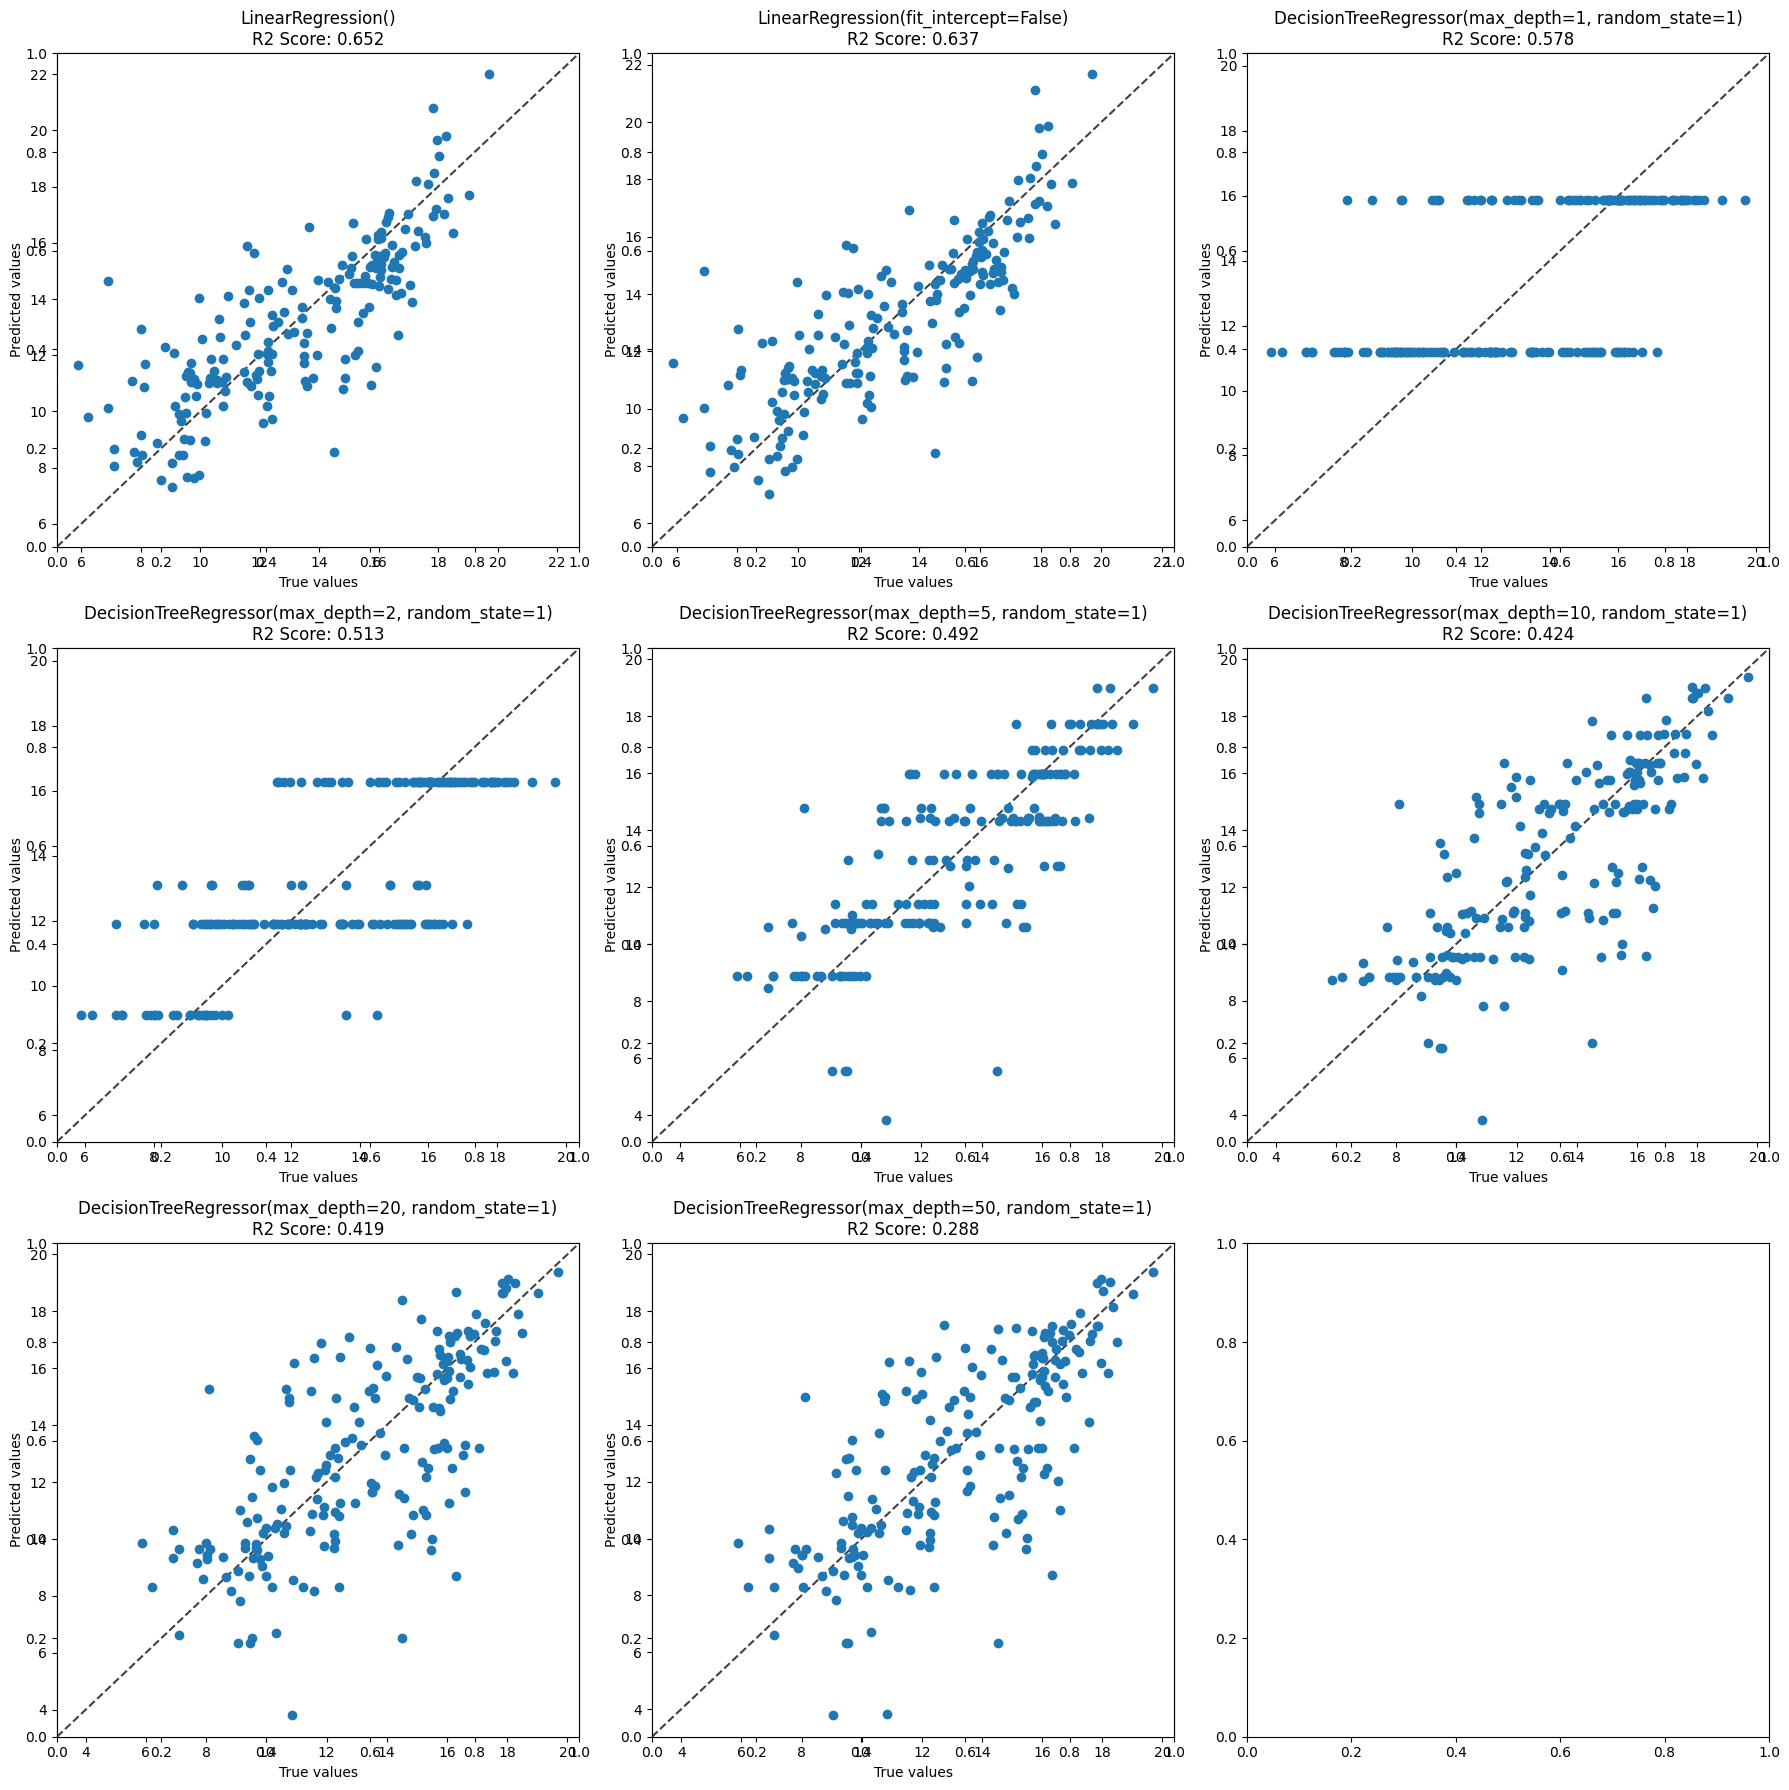

In [346]:
scatterplot_model_preformence(all_model_combinations_df,list_of_models)

In [302]:
best_performing_model = all_model_combinations_df.sort_values(by='test_score_r2', ascending=False).head(1)
best_model = best_performing_model['trained_model'][0].fit(x_train_scaled,y_train)
print(f"Our best performing model so far is {best_model} --> {round(best_performing_model['test_score_r2'][0],3)} test_score score")

Our best performing model so far is LinearRegression(fit_intercept=False) --> 0.652 test_score score


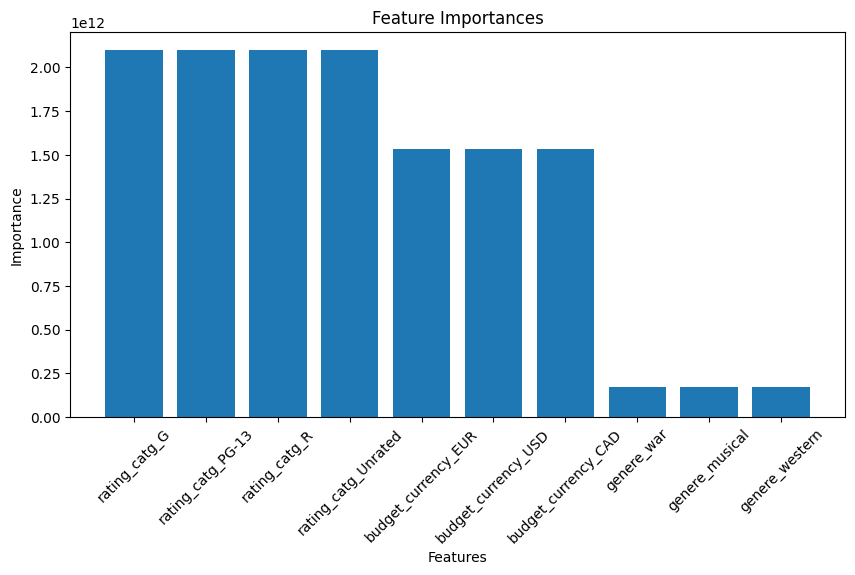

In [303]:
coefficients = best_model.coef_

# Display feature importances
feature_importances = pd.DataFrame(
    {"Feature": feature_names, "Importance": np.abs(coefficients)}
)
feature_importances = feature_importances.sort_values(
    by="Importance", ascending=False
)

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10))
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(range(10), feature_importances['Feature'].head(10), rotation=45)
plt.show()

## Ensemble Models - Boosting

<br><b>Ensemble Models:</b><br>
Ensemble models are machine learning algorithms that combine the predictions of multiple base models to make more accurate predictions.

Unlike Single Classification models where we used cross-val on our training set, for Bootstrapping methods we will need to create a separate validation data-set

In [354]:
dict_of_models = {'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [355]:
parametersOfValue = {
    'estimator':[None], #[best_model,None],
    'n_estimators':[1000, 2000, 3000],
    'max_depth':[5,8],
    'learning_rate':[0.01,0.001],
    'random_state':[1]
    }

In [356]:
boosting_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
boosting_model_combinations_df

Model Type: AdaBoostRegressor - 6 hyper-parameter combinations
Model Type: XGBRegressor  - 12 hyper-parameter combinations


model_type estimator learning_rate n_estimators  \
AdaBoostRegressor_0  AdaBoostRegressor      None          0.01         1000   
AdaBoostRegressor_1  AdaBoostRegressor      None          0.01         2000   
AdaBoostRegressor_2  AdaBoostRegressor      None          0.01         3000   
AdaBoostRegressor_3  AdaBoostRegressor      None         0.001         1000   
AdaBoostRegressor_4  AdaBoostRegressor      None         0.001         2000   
AdaBoostRegressor_5  AdaBoostRegressor      None         0.001         3000   
XGBRegressor _0          XGBRegressor        NaN          0.01         1000   
XGBRegressor _1          XGBRegressor        NaN          0.01         2000   
XGBRegressor _2          XGBRegressor        NaN          0.01         3000   
XGBRegressor _3          XGBRegressor        NaN          0.01         1000   
XGBRegressor _4          XGBRegressor        NaN          0.01         2000   
XGBRegressor _5          XGBRegressor        NaN          0.01         3000   
XGBRegressor _6          XGBRegressor        NaN         0.001         1000   
XGBRegressor _7          XGBRegressor        NaN         0.001         2000   
XGBRegressor _8          XGBRegressor        NaN         0.001         3000   
XGBRegressor _9          XGBRegressor        NaN         0.001         1000   
XGBRegressor _10         XGBRegressor        NaN         0.001         2000   
XGBRegressor _11         XGBRegressor        NaN         0.001         3000   

                    random_state max_depth  
AdaBoostRegressor_0            1       NaN  
AdaBoostRegressor_1            1       NaN  
AdaBoostRegressor_2            1       NaN  
AdaBoostRegressor_3            1       NaN  
AdaBoostRegressor_4            1       NaN  
AdaBoostRegressor_5            1       NaN  
XGBRegressor _0                1         5  
XGBRegressor _1                1         5  
XGBRegressor _2                1         5  
XGBRegressor _3                1         8  
XGBRegressor _4                1         8  
XGBRegressor _5                1         8  
XGBRegressor _6                1         5  
XGBRegressor _7                1         5  
XGBRegressor _8                1         5  
XGBRegressor _9                1         8  
XGBRegressor _10               1         8  
XGBRegressor _11               1         8

In [ ]:
boosting_model_combinations_df, list_boosting_models = run_various_models_return_results(boosting_model_combinations_df, dict_of_models, use_cross_validate=False)

AdaBoostRegressor_0 AdaBoostRegressor AdaBoostRegressor(learning_rate=0.01, n_estimators=1000, random_state=1) 0.771085477687224 0.69078945819704
Excepion on run_various_models_return_results
Must have equal len keys and value when setting with an iterable
Model Name: AdaBoostRegressor_0 - AdaBoostRegressor(learning_rate=0.01, n_estimators=1000, random_state=1) - train_score: 0.771 / test_score: 0.691.


In [ ]:
boosting_model_combinations_df

In [ ]:
scatterplot_model_preformence(boosting_model_combinations_df,list_boosting_models)

For Boosting model we would prefer to keep our trees shallow and non-complex, since they are built sequntially and we do not want to risk ovefitting.<br>
Next, we would like to explor some highly deel trees:

## Ensemble Models - Bagging

In BaggingClassifier, the subsets of the training data are generated using bootstrap sampling, which means that each subset is a random sample of the training data with replacement.<br>
It involves training multiple base models independently on different subsets of the training data, and then combining the predictions of the individual base models to make a final prediction.

In [ ]:
dict_of_models = {'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                 }

In [ ]:
parametersOfValue = {
    'estimator':[None], #[best_model,None],
    'n_estimators':[500, 1000,2000],
    'max_depth':[5,8],
    'learning_rate':[0.01,0.001],
    'random_state':[1]
    }

In [ ]:
bagging_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
bagging_model_combinations_df

Model Type: AdaBoostRegressor - 6 hyper-parameter combinations


model_type estimator learning_rate n_estimators  \
AdaBoostRegressor_0  AdaBoostRegressor      None          0.01          500   
AdaBoostRegressor_1  AdaBoostRegressor      None          0.01         1000   
AdaBoostRegressor_2  AdaBoostRegressor      None          0.01         2000   
AdaBoostRegressor_3  AdaBoostRegressor      None         0.001          500   
AdaBoostRegressor_4  AdaBoostRegressor      None         0.001         1000   
AdaBoostRegressor_5  AdaBoostRegressor      None         0.001         2000   

                    random_state  
AdaBoostRegressor_0            1  
AdaBoostRegressor_1            1  
AdaBoostRegressor_2            1  
AdaBoostRegressor_3            1  
AdaBoostRegressor_4            1  
AdaBoostRegressor_5            1

In [ ]:
boosting_model_combinations_df = run_various_models_return_results(bagging_model_combinations_df, dict_of_models, use_cross_validate=False)

AdaBoostRegressor_0 AdaBoostRegressor AdaBoostRegressor(learning_rate=0.01, n_estimators=500, random_state=1) 0.7592050694678468 0.6903835994046605
Excepion on run_various_models_return_results
Must have equal len keys and value when setting with an iterable
Model Name: AdaBoostRegressor_0 - AdaBoostRegressor(learning_rate=0.01, n_estimators=500, random_state=1) - train_score: 0.759 / test_score: 0.69.
AdaBoostRegressor_1 AdaBoostRegressor AdaBoostRegressor(learning_rate=0.01, n_estimators=1000, random_state=1) 0.771085477687224 0.69078945819704
Excepion on run_various_models_return_results
Must have equal len keys and value when setting with an iterable
Model Name: AdaBoostRegressor_1 - AdaBoostRegressor(learning_rate=0.01, n_estimators=1000, random_state=1) - train_score: 0.771 / test_score: 0.691.
AdaBoostRegressor_2 AdaBoostRegressor AdaBoostRegressor(learning_rate=0.01, n_estimators=2000, random_state=1) 0.7766654312813924 0.692086255375274
Excepion on run_various_models_return_re

In [ ]:
bagging_model_combinations_df

model_type estimator learning_rate n_estimators  \
AdaBoostRegressor_2  AdaBoostRegressor      None          0.01         2000   
AdaBoostRegressor_1  AdaBoostRegressor      None          0.01         1000   
AdaBoostRegressor_0  AdaBoostRegressor      None          0.01          500   
AdaBoostRegressor_4  AdaBoostRegressor      None         0.001         1000   
AdaBoostRegressor_5  AdaBoostRegressor      None         0.001         2000   
AdaBoostRegressor_3  AdaBoostRegressor      None         0.001          500   

                    random_state  train_score  val_score  test_score_r2  \
AdaBoostRegressor_2            1     0.776665        NaN       0.692086   
AdaBoostRegressor_1            1     0.771085        NaN       0.690789   
AdaBoostRegressor_0            1     0.759205        NaN       0.690384   
AdaBoostRegressor_4            1     0.745537        NaN       0.685613   
AdaBoostRegressor_5            1     0.748623        NaN       0.683822   
AdaBoostRegressor_3            1     0.742708        NaN       0.682646   

                     test_score_mse  train_size  test_size  feature_n  \
AdaBoostRegressor_2        3.106561       770.0      193.0       96.0   
AdaBoostRegressor_1        3.119644       770.0      193.0       96.0   
AdaBoostRegressor_0        3.123739       770.0      193.0       96.0   
AdaBoostRegressor_4        3.171866       770.0      193.0       96.0   
AdaBoostRegressor_5        3.189937       770.0      193.0       96.0   
AdaBoostRegressor_3        3.201803       770.0      193.0       96.0   

                     run_time  trained_model  
AdaBoostRegressor_2   13.9097            NaN  
AdaBoostRegressor_1    6.9896            NaN  
AdaBoostRegressor_0    3.9893            NaN  
AdaBoostRegressor_4    7.8235            NaN  
AdaBoostRegressor_5   14.5452            NaN  
AdaBoostRegressor_3    3.3477            NaN

In [ ]:
n_estimators=500
max_depth=20
random_state=1

In [ ]:

base_estimator = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)


In [ ]:
model_name = f'BaggingClassifier_{n_estimators}_estimators_{max_depth}_dept'

regression_model = BaggingClassifier(base_estimator=base_estimator,
                                    random_state=random_state,
                                    n_estimators=n_estimators)

start = timer()

# Populate hyper Parameters into df
all_model_combinations_df.at[model_name,'n_estimators']=n_estimators
all_model_combinations_df.at[model_name,'random_state']=random_state
all_model_combinations_df.at[model_name,'learning_rate']=learning_rate
all_model_combinations_df.at[model_name,'max_depth']=max_depth
all_model_combinations_df.at[model_name,'model_type']="BaggingClassifier"

# Fit on entire training data
regression_model.fit(X_train80, y_train80)

# Get model train and test scores
train_score = regression_model.score(X_train80, y_train80)
val_score = regression_model.score(X_val, y_val)
test_score = regression_model.score(x_test_scaled,y_test)

all_model_combinations_df.at[model_name,'train_score']=train_score
all_model_combinations_df.at[model_name,'val_score']=val_score
all_model_combinations_df.at[model_name,'test_score']=test_score

yhat= regression_model.predict_proba(x_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)
auc_result = auc(fpr,tpr)
all_model_combinations_df.at[model_name,'auc_result']=auc_result


all_model_combinations_df.at[model_name,'train_size']=X_train80.shape[0]
all_model_combinations_df.at[model_name,'test_size']=x_test_scaled.shape[0]
all_model_combinations_df.at[model_name,'feature_n']=x_test_scaled.shape[1]

ensemble_model_list.append({"model_name":model_name, "yhat":yhat, "auc_result":auc_result })

end = timer()
run_time_secs = round(end - start,4)
all_model_combinations_df.at[model_name,'run_time']=run_time_secs


print(f"{model_name} - Train: {round(train_score,3)}, Test: {round(test_score,3)}, AUC: {round(auc_result,3)}")

In [ ]:
columns_to_display = ['train_score','val_score','test_score','auc_result','feature_n','run_time']
all_model_combinations_df[columns_to_display].filter(items = [model_name], axis=0).round(4)

<br><b>Bagging feature importance:</b><br>
For regular bagging the top selected feature will always be the same

In [ ]:
col_names = x_train_scaled.columns

top_feature_dict = {col:0 for col in col_names}

for dtree in regression_model.estimators_:
    top_feature_Id = dtree.tree_.feature[0]
    top_feature_name = col_names[top_feature_Id]
    
    top_feature_dict[top_feature_name]+=1
    
top_predictors_bagging = pd.DataFrame(top_feature_dict, index=["Top Count - Bagging"]).head(1).T
top_predictors_bagging.sort_values(["Top Count - Bagging"], ascending=False).head(10)

<br><b>Random Forest:</b><br>
Random forest uses decision trees as the base model and trains them using a random subset of the features, and it combines the predictions using a weighted averageRandom forest uses decision trees as the base model and trains them using a random subset of the features, and it combines the predictions using a weighted average.

In [ ]:
n_estimators=500
max_depth=20
random_state=1

In [ ]:
model_name = f'RandomForestClassifier_{n_estimators}_estimators_{max_depth}_dept'

regression_model = RandomForestClassifier(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         max_features='sqrt', 
                                         random_state=random_state)

start = timer()

# Populate hyper Parameters into df
all_model_combinations_df.at[model_name,'n_estimators']=n_estimators
all_model_combinations_df.at[model_name,'random_state']=random_state
all_model_combinations_df.at[model_name,'learning_rate']=learning_rate
all_model_combinations_df.at[model_name,'max_depth']=max_depth
all_model_combinations_df.at[model_name,'model_type']="RandomForestClassifier"

# Fit on entire training data
regression_model.fit(x_train_scaled, y_train)

# Get model train and test scores
train_score = regression_model.score(X_train80, y_train80)
val_score = regression_model.score(X_val, y_val)
test_score = regression_model.score(x_test_scaled,y_test)

all_model_combinations_df.at[model_name,'train_score']=train_score
all_model_combinations_df.at[model_name,'val_score']=val_score
all_model_combinations_df.at[model_name,'test_score']=test_score

yhat= regression_model.predict_proba(x_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)
auc_result = auc(fpr,tpr)
all_model_combinations_df.at[model_name,'auc_result']=auc_result


all_model_combinations_df.at[model_name,'train_size']=X_train80.shape[0]
all_model_combinations_df.at[model_name,'test_size']=x_test_scaled.shape[0]
all_model_combinations_df.at[model_name,'feature_n']=x_test_scaled.shape[1]

ensemble_model_list.append({"model_name":model_name, "yhat":yhat, "auc_result":auc_result })

end = timer()
run_time_secs = round(end - start,4)
all_model_combinations_df.at[model_name,'run_time']=run_time_secs


print(f"{model_name} - Train: {round(train_score,3)}, Test: {round(test_score,3)}, AUC: {round(auc_result,3)}")

In [ ]:
columns_to_display = ['train_score','val_score','test_score','auc_result','feature_n','run_time']
all_model_combinations_df[columns_to_display].filter(items = [model_name], axis=0).round(4)

<br><b>Confusion Matrix:</b><br>
We will observe our predictions and try and see how the model preforms on each of the classes:

In [ ]:
predicted_labels  = regression_model.predict(x_test_scaled)
confusion_mat = confusion_matrix(y_test, predicted_labels)

# print the confusion matrix
pd.DataFrame(confusion_mat,columns=["P.Flop","P.Hit"],index=["Flop","Hit"])

<br><b>Random Forest feature selection:</b><br>
Same as bagging, only with random feature selection

In [ ]:
top_feature_dict = {col:0 for col in col_names}

for dtree in regression_model.estimators_:
    top_feature_Id = dtree.tree_.feature[0]
    top_feature_name = col_names[top_feature_Id]
    
    top_feature_dict[top_feature_name]+=1
    
top_predictors_bagging = pd.DataFrame(top_feature_dict, index=["Top Count - Random Forest"]).head(1).T
top_predictors_bagging.sort_values(["Top Count - Random Forest"], ascending=False)

In [ ]:
columns_to_run = list(top_predictors_bagging[top_predictors_bagging['Top Count - Random Forest']>10].index)
columns_to_run

In [ ]:
random_forest_model_thin = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features='sqrt', random_state=random_state)
random_forest_model_thin.fit(x_train_scaled[columns_to_run],y_train)

In [ ]:
model_name = f'RandomForestClassifier_Thin_{n_estimators}_estimators_{max_depth}_dept'

regression_model = RandomForestClassifier(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         max_features='sqrt', 
                                         random_state=random_state)

start = timer()

# Populate hyper Parameters into df
all_model_combinations_df.at[model_name,'n_estimators']=n_estimators
all_model_combinations_df.at[model_name,'random_state']=random_state
all_model_combinations_df.at[model_name,'learning_rate']=learning_rate
all_model_combinations_df.at[model_name,'max_depth']=max_depth
all_model_combinations_df.at[model_name,'model_type']="RandomForestClassifier"

# Fit on entire training data
regression_model.fit(X_train80[columns_to_run], y_train80)

# Get model train and test scores
train_score = regression_model.score(X_train80[columns_to_run],y_train80)
val_score = regression_model.score(X_val[columns_to_run],y_val)
test_score = regression_model.score(x_test_scaled[columns_to_run],y_test)

all_model_combinations_df.at[model_name,'train_score']=train_score
all_model_combinations_df.at[model_name,'val_score']=val_score
all_model_combinations_df.at[model_name,'test_score']=test_score

yhat= regression_model.predict_proba(x_test_scaled[columns_to_run])[:,1]

fpr, tpr, thresholds = roc_curve(y_test, yhat)
auc_result = auc(fpr,tpr)
all_model_combinations_df.at[model_name,'auc_result']=auc_result


all_model_combinations_df.at[model_name,'train_size']=X_train80[columns_to_run].shape[0]
all_model_combinations_df.at[model_name,'test_size']=x_test_scaled[columns_to_run].shape[0]
all_model_combinations_df.at[model_name,'feature_n']=x_test_scaled[columns_to_run].shape[1]

ensemble_model_list.append({"model_name":model_name, "yhat":yhat, "auc_result":auc_result })


end = timer()
run_time_secs = round(end - start,4)
all_model_combinations_df.at[model_name,'run_time']=run_time_secs

print(f"{model_name} - Train: {round(train_score,3)}, Test: {round(test_score,3)}, AUC: {round(auc_result,3)}")

In [ ]:
columns_to_display = ['train_score','val_score','test_score','auc_result','feature_n','run_time']
all_model_combinations_df[columns_to_display].filter(items = [model_name], axis=0).round(4)

<br><br><b>Comparing the final results</b><br>


<br><b>Best Performing model:</b><br>
Since we collected all sort of output scores from our model, we can check and see which model performed best for each category:

"Show off" award:<br>
The award for the model with the best training score:

In [ ]:
cols_to_show = ['model_type','C','penalty','solver','max_depth','n_neighbors','train_score','val_score','test_score','auc_result','run_time']
print(f"Top 3 performing models based on Train Score")
all_model_combinations_df[cols_to_show].sort_values(by='train_score', ascending=False).head(3)

Accuracy award:<br>
The award for best overall test score model (Based on proportion of correct predictions made by the classifier)

In [ ]:

print(f"Top 3 performing models based on Test Score")
all_model_combinations_df[cols_to_show].sort_values(by='test_score', ascending=False).head(3)

AUC award:<br>
The award for the model best able to distinguish between the two classes by plotting the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds and calculating the area under their curve

In [ ]:
print(f"Top 3 performing models based on AUC Score")
all_model_combinations_df[cols_to_show].sort_values(by='auc_result', ascending=False).head(3)

In [ ]:
def plot_roc_curve_yhat(X,Y, yhat, model_name="Classification Model"):
    
    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(Y, yhat)
    auc_result = auc(fpr,tpr)

    x=np.arange(0,100)/100
    ax.plot(x,x,'--',color="gray",alpha=0.3)
    ax.plot(fpr,tpr,label=model_name)
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    ax.set_title(f"ROC Curve for top performing models.")
    ax.legend()
    ax.plot()

In [ ]:
col_size = 2

fig, ax = plt.subplots(1,1, figsize=(10,10))

for i, item in enumerate(ensemble_model_list):
    
    model_name = item["model_name"]
    yhat_ = item["yhat"]
    auc_result_ = item['auc_result']
    
    plot_roc_curve_yhat(x_test_scaled,y_test,yhat_,model_name=model_name)


Now that we have trained and tested all our models, we can compare them to each other:

In [ ]:
columns_to_display = ['train_score','val_score','test_score','auc_result','feature_n','run_time']
all_model_combinations_df[columns_to_display].sort_values(by='auc_result', ascending=False).head(15)

When we set on our way our goal was to find the best performing model which will provide us not only with good accuracy, but also with a balances False-To-Positive ratio across different thresholds.<br>
After examining all various models and features, we have found that our most reliable model will be a RandomForestClassifier with a depth of 20 for each DecisionTree.<br>
The model should be trained on the entire dataset (regardless of feature importance) and predict with all features.<br>


# Data Preperation - Metascore

## Filtering out missing data

In [ ]:
metascore_na_mask = y_metascore.isna()
y_meta = y_metascore[~metascore_na_mask]
X_meta = X_ohe_reduced[~metascore_na_mask]
X_meta.shape,y_meta.shape
print(f"Only {len(y_meta)} out of {len(metascore_na_mask)} records had MetaScore and will be kept")

In [ ]:
# Create the histogram
plt.hist(y_meta, bins=20)  # You can adjust the number of bins as needed

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of metascore')

# Display the plot
plt.show()

## Split Train-Test data

<br><b>Split Train-Test Data</b><br>
Since our dataset is medium sized it is best to use a standard 20% of the data as test:

In [ ]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(X_meta, y_meta, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_raw.shape[0]} with {x_train_raw.shape[1]} features")
print(f"Test DataSet: {x_test_raw.shape[0]} with {x_test_raw.shape[1]} features")

## Scaling

<br><b>Scaling</b><br>
We will fit the scale on the training dataset then use it to transform both train and test datasets.

In [ ]:
# We will scale on the training dataset then apply it to both train and test
scalar_metascore = StandardScaler(copy=True, with_mean=True, with_std=True).fit(x_train_raw[numerical_columns])

x_train_scaled = pd.DataFrame(scalar_metascore.transform(x_train_raw[numerical_columns]),columns=numerical_columns, index=x_train_raw.index)
x_test_scaled = pd.DataFrame(scalar_metascore.transform(x_test_raw[numerical_columns]),columns=numerical_columns, index=x_test_raw.index)
  
x_train_scaled.head(5).round(3)

In [ ]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=5000, random_state=42)

# Train the model
rf_regressor.fit(x_train_scaled, y_train.ravel())

# Make predictions
y_pred = rf_regressor.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot actual y values against predicted y values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Actual y values vs Predicted y values')
plt.legend()
plt.show()

In [ ]:
# Get feature importances
importances = rf_regressor.feature_importances_

# Create a bar plot for feature importances
plt.bar(range(len(importances)), importances, color='blue', align='center')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

y_pred = model.predict(x_test_scaled)

# Plot y_test vs. y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('Original y (y_test)')
plt.ylabel('Predicted y (y_pred)')
plt.title('Original y vs. Predicted y')

# Add a diagonal line to indicate perfect predictions
limits = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(limits, limits, 'k--', alpha=0.6)

plt.show()